In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# **Loading the Dataset**

In [2]:
#Loading the dataset from multiple CSV files into Pandas DataFrames, which can then be used for further analysis, preprocessing, and model building.
test_data = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
train_data = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
sample_data = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")
movies_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")



In [3]:
#This command is used to retrieve the dimensions of the DataFrame
movies_data.shape

(143258, 14)

In [4]:
#This method is used to display a concise summary of the information train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [5]:
# This method is used to display the first five rows of the DataFrame train_data
train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [6]:
# This command is used to calculate the sum of missing values in each column of the DataFrame train_data
train_data.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [7]:
train_data['reviewText'].fillna('', inplace=True)
# It is used to fill missing (NaN) values in the 'reviewText' column of the DataFrame train_data with an empty string (''). 
# The .fillna() method is applied specifically to the 'reviewText' column.

In [8]:
train_data.describe()
# The describe() function in pandas is used to generate descriptive statistics of the data in a DataFrame.

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,162758,162758
unique,16812,4482,2,155072,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,,POSITIVE
freq,708,962,113189,6447,108761


In [9]:
#This method is used to display a concise summary of the information train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          162758 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [10]:
# This command is used to calculate the sum of missing values in each column of the DataFrame test_data
test_data.isnull().sum()

movieid            0
reviewerName       0
isTopCritic        0
reviewText      2510
dtype: int64

In [11]:
test_data['reviewText'].fillna('', inplace=True)
# It is used to fill missing (NaN) values in the 'reviewText' column of the DataFrame test_data with an empty string (''). 
# The .fillna() method is applied specifically to the 'reviewText' column.

In [12]:
test_data.describe()
# The describe() function in pandas is used to generate descriptive statistics of the data in a DataFrame.

,movieid,reviewerName,isTopCritic,reviewText
count,55315,55315,55315,55315
unique,16786,4495,2,52687
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,
freq,230,428,38428,2510


# **Distribution of Sentiment:**
 
 * **Count the number of positive and negative sentiment reviews.**
 * **Visualize the distribution of sentiment using a bar plot or pie chart.**

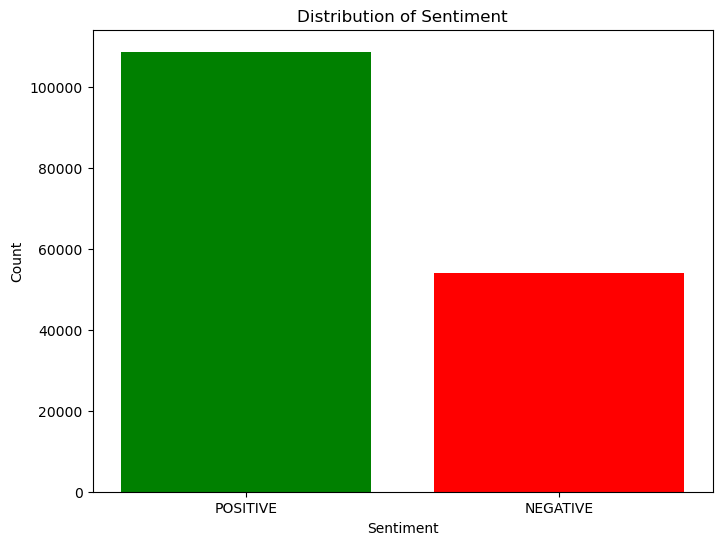

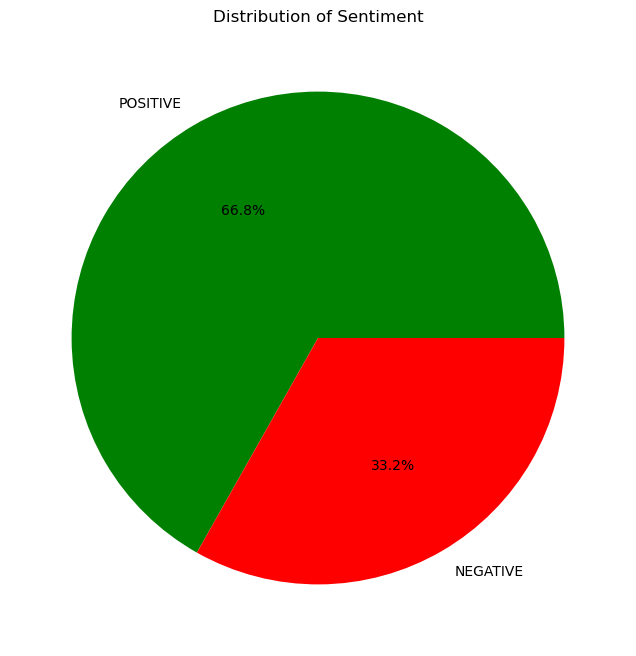

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of positive and negative sentiment reviews
sentiment_counts = train_data['sentiment'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

# Visualize the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribution of Sentiment')
plt.show()

#The code will read the data, count the number of positive and negative sentiment reviews,and then plot them using a bar plot and a pie chart. 
#The bar plot will show the count of positive and negative sentiments, and the pie chart will display the distribution as percentages.

In [14]:
#This method is used to display a concise summary of the information movies_data
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [15]:
# This command is used to calculate the sum of missing values in each column of the DataFrame movies_data
movies_data.isnull().sum()


movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120253
soundType               127341
dtype: int64

# **Dealing with repeated movieid and deleting them before merging**

In [16]:
# It is used to remove duplicate rows from the DataFrame movies_data based on the 'movieid' column.
# The .drop_duplicates() method is applied with the inplace=True argument, meaning that the changes will be made directly to the movies_data DataFrame without the need to reassign it to a variable.
movies_data.drop_duplicates(inplace=True,subset=['movieid'])


In [17]:
#This command is used to retrieve the dimensions of the DataFrame
movies_data.shape

(126404, 14)

In [18]:
movies_data.describe()
# The describe() function in pandas is used to generate descriptive statistics of the data in a DataFrame.

,audienceScore,runtimeMinutes
count,63714.000000,113910.000000
mean,55.866968,93.570450
std,24.627308,28.240486
min,0.000000,1.000000
25%,38.000000,83.000000
50%,58.000000,92.000000
75%,76.000000,103.000000
max,100.000000,2700.000000


In [19]:
merged_data = pd.merge(train_data, movies_data, on='movieid', how='left')
# It is used to merge two DataFrames, train_data and movies_data, based on a common column 'movieid' using a left join operation. 
# The resulting merged data is stored in a new DataFrame called merged_data.


In [20]:
merged_data.info()
#This method is used to display a concise summary of the information merged_data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            162758 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [21]:
merged_data.shape
#This command is used to retrieve the dimensions of the DataFrame


(162758, 18)

In [22]:
merged_data.info()
#This method is used to display a concise summary of the information merged_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               162758 non-null  object 
 1   reviewerName          162758 non-null  object 
 2   isFrequentReviewer    162758 non-null  bool   
 3   reviewText            162758 non-null  object 
 4   sentiment             162758 non-null  object 
 5   title                 162758 non-null  object 
 6   audienceScore         149510 non-null  float64
 7   rating                99034 non-null   object 
 8   ratingContents        99034 non-null   object 
 9   releaseDateTheaters   126924 non-null  object 
 10  releaseDateStreaming  146573 non-null  object 
 11  runtimeMinutes        159382 non-null  float64
 12  genre                 160320 non-null  object 
 13  originalLanguage      159468 non-null  object 
 14  director              162758 non-null  object 
 15  

In [23]:
merged_data.describe()
# The describe() function in pandas is used to generate descriptive statistics of the data in a DataFrame.

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000



# **Director Analysis:**

* **Identify the directors with the most reviews.**
* **Explore the average sentiment of movies directed by different directors.**

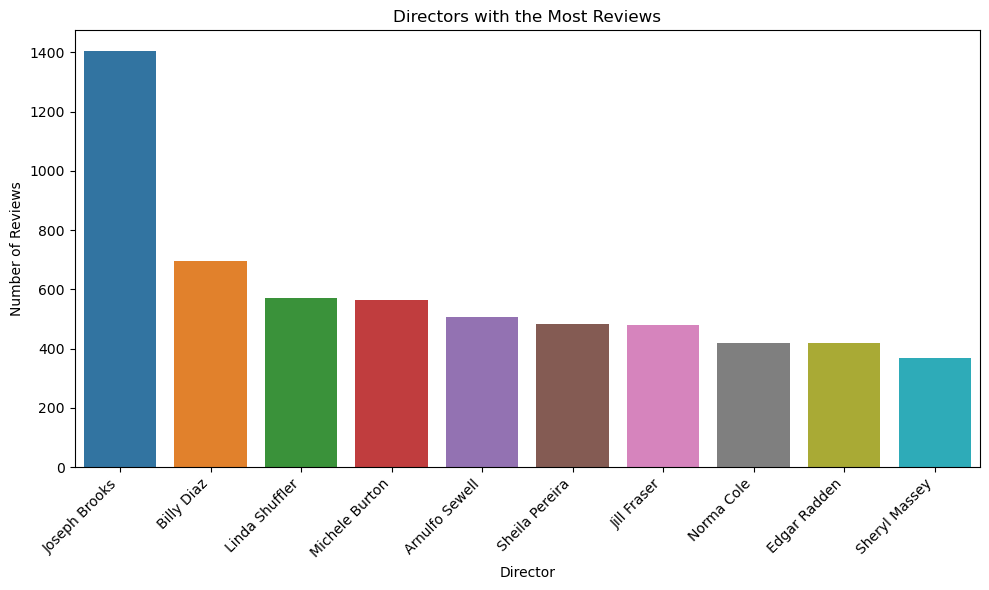

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# # # Combine train and test merged data for overall analysis
# merged = pd.concat([merged_data, test_merged], ignore_index=True)

# # Identify the directors with the most reviews
top_directors = merged_data['director'].value_counts().nlargest(10)

# # Plot the directors with the most reviews
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xlabel('Director')
plt.ylabel('Number of Reviews')
plt.title('Directors with the Most Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# These visualizations will help us understand which directors have the most reviews and the average sentiment associated with their movies, 
# allowing us to identify any patterns or trends in movie sentiment based on the directors.

In [25]:


columns_to_keep = ['reviewText','isFrequentReviewer','runtimeMinutes','audienceScore','sentiment','rating','genre','movieid','reviewerName','originalLanguage','boxOffice']
merged_data.drop(columns=[col for col in merged_data.columns if col not in columns_to_keep], inplace=True)
# These are used to select and keep specific columns in the merged_data DataFrame while dropping all other columns that are not listed in the columns_to_keep list. 
# This is a way to subset the DataFrame and retain only the desired columns for further analysis or modeling.

In [26]:
merged_data.describe()
# The describe() function in pandas is used to generate descriptive statistics of the data in a DataFrame.

,audienceScore,runtimeMinutes
count,149510.000000,159382.000000
mean,65.214541,106.911828
std,19.937695,22.138131
min,0.000000,4.000000
25%,51.000000,93.000000
50%,68.000000,104.000000
75%,82.000000,118.000000
max,100.000000,561.000000


# **Missing Values and there Imputation**

In [27]:
merged_data.isnull().sum()
# This command is used to calculate the sum of missing values in each column of the DataFrame merged_data

movieid                   0
reviewerName              0
isFrequentReviewer        0
reviewText                0
sentiment                 0
audienceScore         13248
rating                63724
runtimeMinutes         3376
genre                  2438
originalLanguage       3290
boxOffice             52776
dtype: int64

# **Missing Data:**

* **Identify the percentage of missing data in each column.**
* **Investigate if the missing data is random or if there are any patterns.**

Missing Data Percentage:
movieid                0.000000
reviewerName           0.000000
isFrequentReviewer     0.000000
reviewText             0.000000
sentiment              0.000000
audienceScore          8.139692
rating                39.152607
runtimeMinutes         2.074245
genre                  1.497929
originalLanguage       2.021406
boxOffice             32.426056
dtype: float64


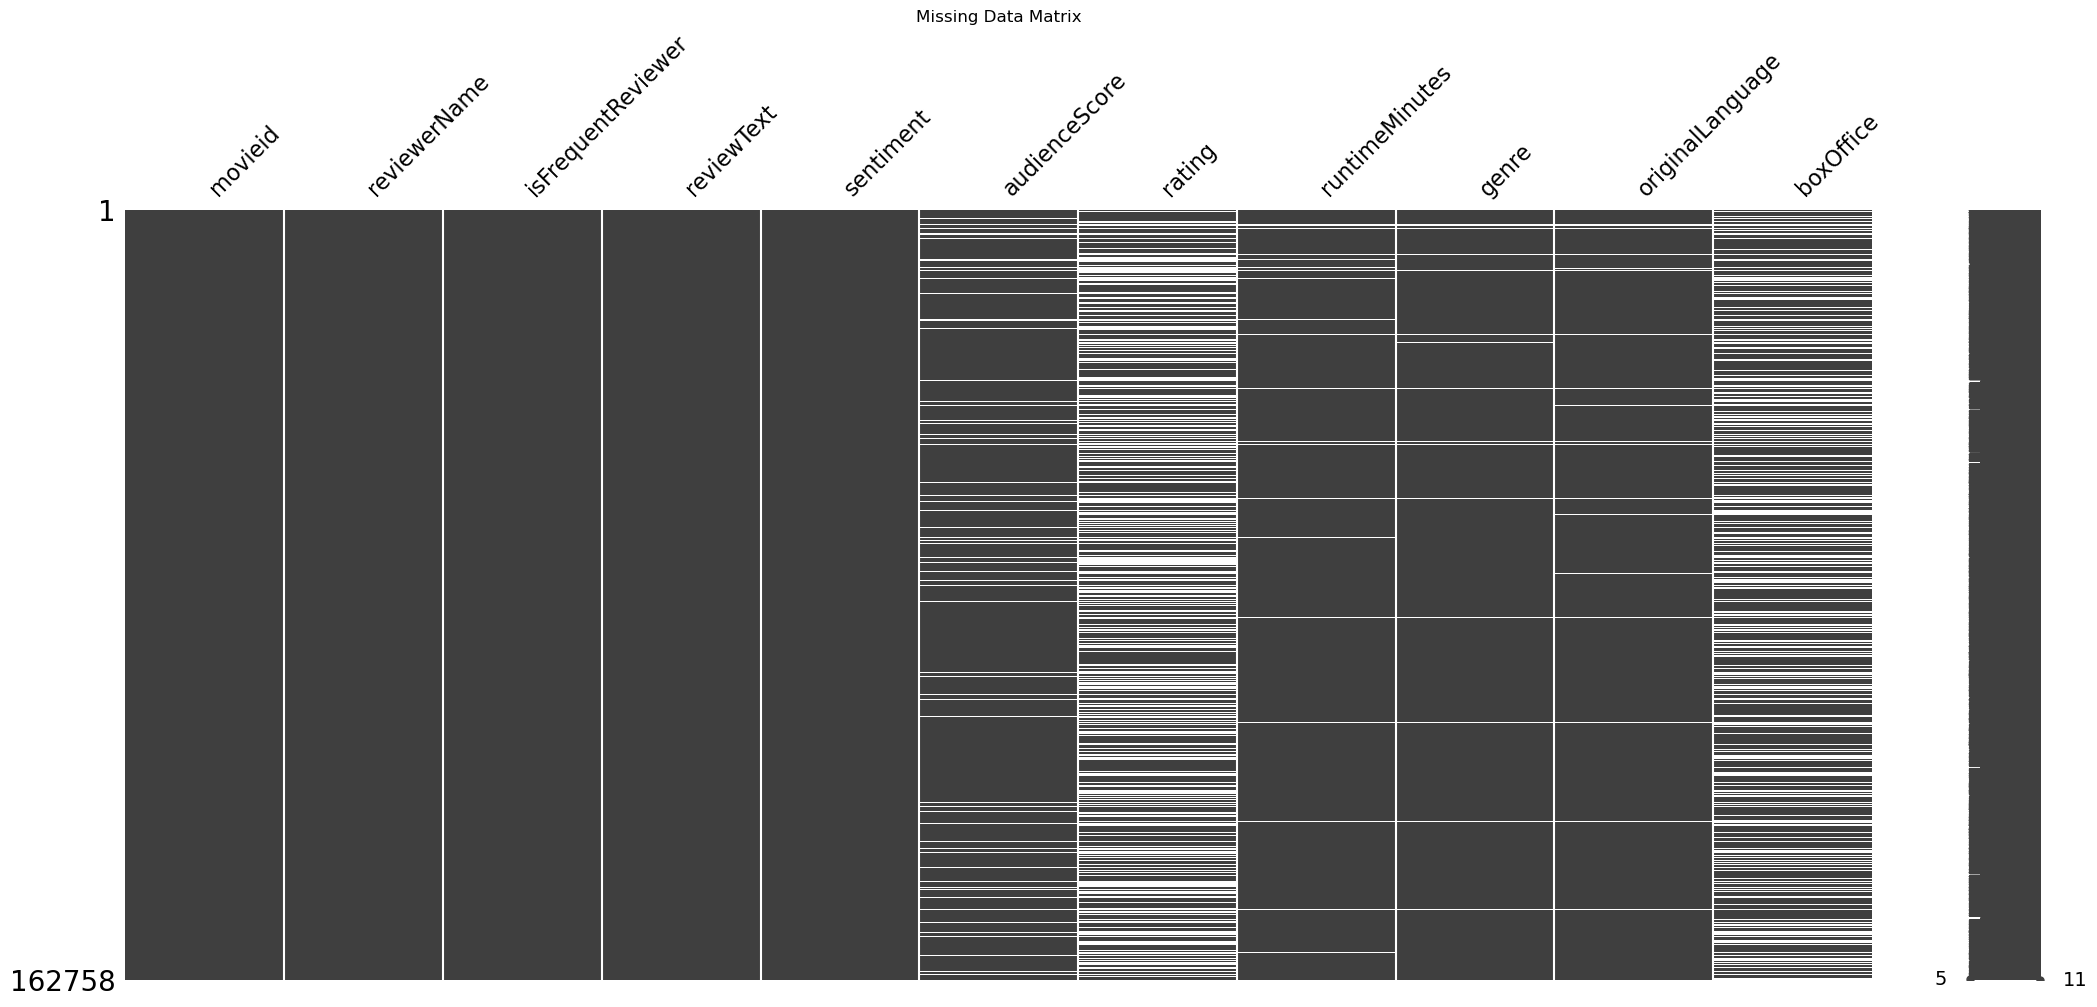

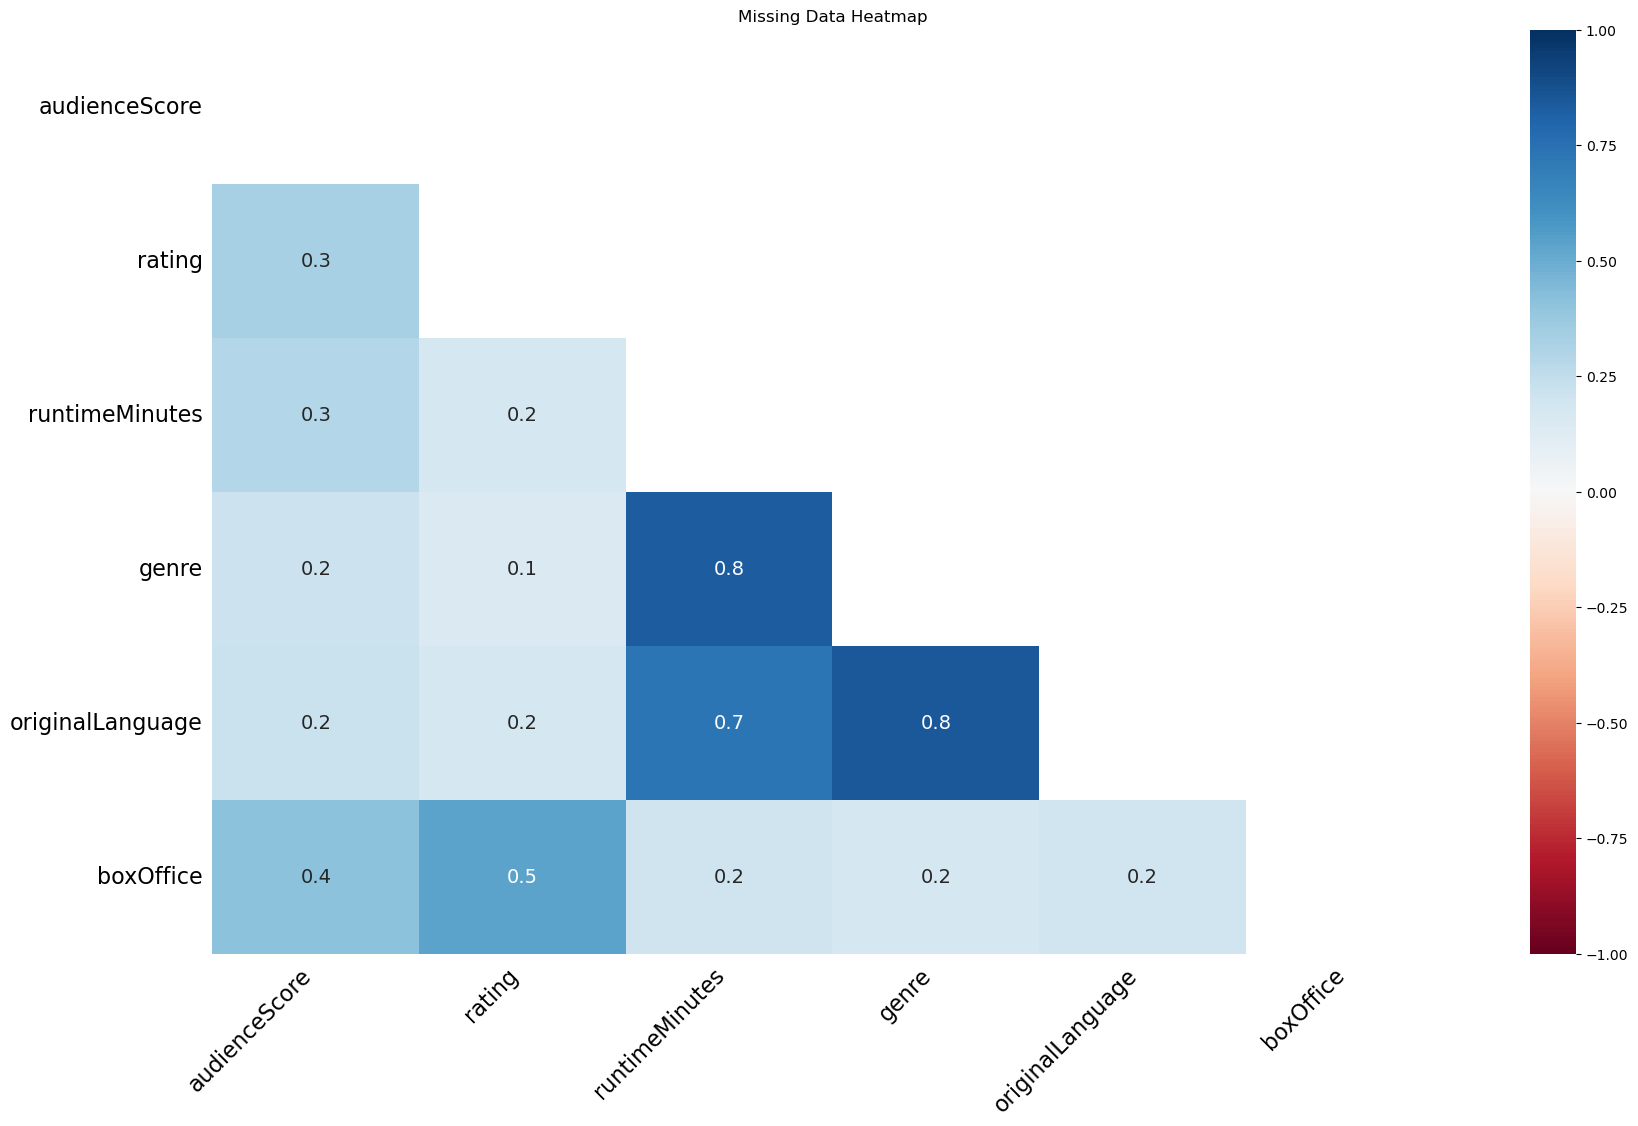

In [28]:

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


# Calculate the percentage of missing data in each column
missing_percentage = merged_data.isnull().sum() / len(merged_data) * 100

# Display missing data percentage
print("Missing Data Percentage:")
print(missing_percentage)

# Plot missing data matrix
msno.matrix(merged_data)
plt.title('Missing Data Matrix')
plt.show()

# Plot missing data heatmap
msno.heatmap(merged_data)
plt.title('Missing Data Heatmap')
plt.show()

# In this code, the msno.matrix() function creates a matrix plot that displays missing values in the dataset.
# Each column is represented by a vertical line where missing values are white, and non-missing values are black. T
# his visualization can help identify patterns or clusters of missing values.

# The msno.heatmap() function creates a heatmap that shows the correlation between missing values in different columns.
# This can help you understand if certain columns tend to have missing values together, indicating potential patterns.

# By using these visualizations, you can gain insights into the nature of missing data and whether there are any non-random patterns or correlations in the missing values.

# **Handling missing value **
* **audienceScore and runtimeMinutes are numerical columns**
* **rating,genre and originalLanguage are categorical columns**

In [29]:
merged_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,audienceScore,rating,runtimeMinutes,genre,originalLanguage,boxOffice
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,65.0,PG-13,105.0,"Comedy, Animation, Adventure, Fantasy",English,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,NaN,NaN,91.0,Action,English,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,80.0,PG-13,130.0,Drama,English,$115.7M
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,NaN,NaN,15.0,Drama,Spanish,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,97.0,R,131.0,"Crime, Drama",Portuguese (Brazil),$7.6M


In [30]:


# Define a function to convert box office strings to float
def convert_box_office(box_office_str):
    if isinstance(box_office_str, str) and box_office_str.endswith('M'):
        try:
            return float(box_office_str.replace('$', '').replace('M', ''))
        except ValueError:
            return None
    else:
        return None

# Apply the function to the 'boxOffice' column
merged_data['boxOffice'] = merged_data['boxOffice'].apply(convert_box_office)






In [31]:
merged_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,audienceScore,rating,runtimeMinutes,genre,originalLanguage,boxOffice
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,65.0,PG-13,105.0,"Comedy, Animation, Adventure, Fantasy",English,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,NaN,NaN,91.0,Action,English,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,80.0,PG-13,130.0,Drama,English,115.7
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,NaN,NaN,15.0,Drama,Spanish,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,97.0,R,131.0,"Crime, Drama",Portuguese (Brazil),7.6


In [32]:

# Impute numerical columns with mean
merged_data['audienceScore'].fillna(merged_data['audienceScore'].mean(), inplace=True)
merged_data['boxOffice'].fillna(merged_data['boxOffice'].mean(), inplace=True)
merged_data['runtimeMinutes'].fillna(merged_data['runtimeMinutes'].median(), inplace=True)

# Impute categorical columns with most frequent category
merged_data['rating'].fillna(merged_data['rating'].mode()[0], inplace=True)
merged_data['genre'].fillna(merged_data['genre'].mode()[0], inplace=True)
merged_data['originalLanguage'].fillna(merged_data['originalLanguage'].mode()[0], inplace=True)

# Verify that there are no missing values left
print(merged_data.isnull().sum())

# simple imputation method
# It imputes missing values in numerical columns with mean/median and in categorical columns with the most frequent category. 
# This is a common approach to handling missing data.



movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
audienceScore         0
rating                0
runtimeMinutes        0
genre                 0
originalLanguage      0
boxOffice             0
dtype: int64


In [33]:
# from sklearn.impute import SimpleImputer

# # Create a SimpleImputer instance for numerical columns (using mean strategy)
# num_imputer = SimpleImputer(strategy='mean')

# # Create a SimpleImputer instance for categorical columns (using most frequent strategy)
# cat_imputer = SimpleImputer(strategy='most_frequent')

# # Impute numerical columns
# merged_data[['audienceScore', 'runtimeMinutes']] = num_imputer.fit_transform(merged_data[['audienceScore', 'runtimeMinutes']])

# # Impute categorical columns
# merged_data[['rating', 'genre', 'originalLanguage']] = cat_imputer.fit_transform(merged_data[['rating', 'genre', 'originalLanguage']])

# # Verify that there are no missing values left
# print(merged_data.isnull().sum())


# **Audience Score and Sentiment:**
* **Analyze the relationship between audienceScore and sentiment.**
* **Check if movies with higher audience scores tend to have positive sentiment**

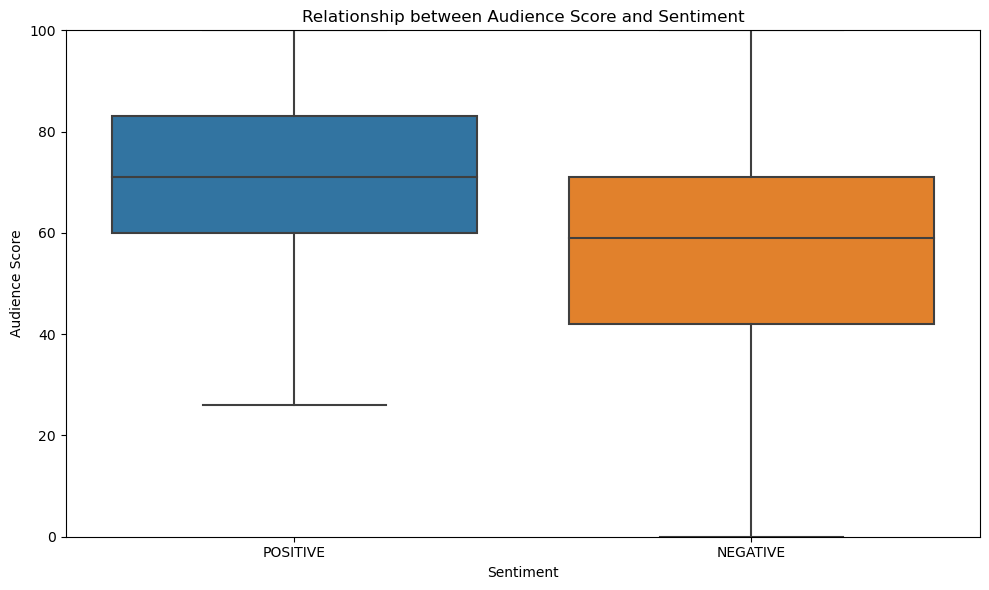

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Analyze the relationship between audienceScore and sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='audienceScore', data=merged_data, showfliers=False)
plt.xlabel('Sentiment')
plt.ylabel('Audience Score')
plt.title('Relationship between Audience Score and Sentiment')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
# The code will generate a box plot that allows us to analyze the relationship between audienceScore and sentiment,
# helping us determine if there's a correlation between higher audience scores and positive sentiment in movies.

# **Reviewer Analysis:**

* **Count the number of reviews per reviewer.**
* **Identify the top reviewers based on the number of reviews.**
* **Analyze the distribution of sentiment per reviewer.**

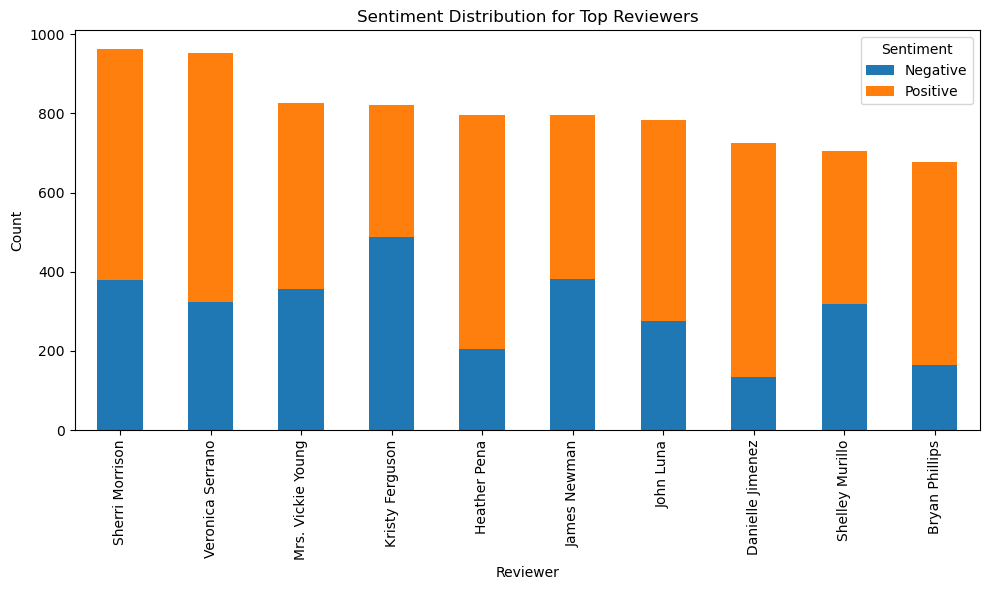

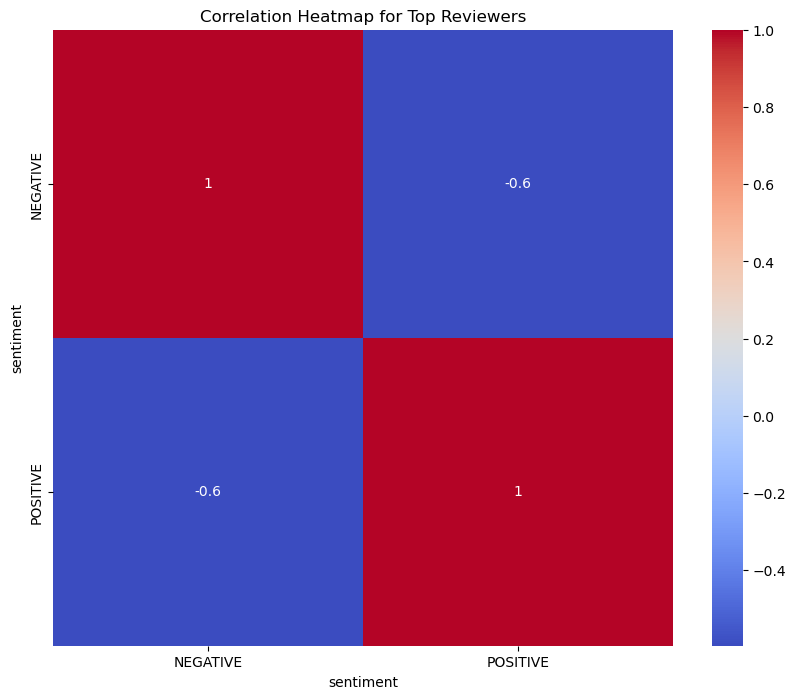

Correlation Matrix:
sentiment  NEGATIVE  POSITIVE
sentiment                    
NEGATIVE    1.00000  -0.59522
POSITIVE   -0.59522   1.00000


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of reviews per reviewer
reviewer_counts = merged_data['reviewerName'].value_counts()

# Identify the top reviewers based on the number of reviews
top_reviewers = reviewer_counts.nlargest(10)  # Change 10 to the desired number of top reviewers to show

# Create a DataFrame to analyze sentiment distribution per reviewer
reviewer_sentiment_df = merged_data.groupby(['reviewerName', 'sentiment']).size().unstack(fill_value=0)

# Filter the sentiment distribution for the top reviewers
top_reviewer_sentiment_df = reviewer_sentiment_df.loc[top_reviewers.index]

# Plot sentiment distribution for the top reviewers
top_reviewer_sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Reviewer')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Top Reviewers')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.tight_layout()
plt.show()

# Analyze the correlation between top reviewers' sentiment distribution
correlation_matrix = top_reviewer_sentiment_df.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Top Reviewers')
plt.show()

# Analyze the findings
print("Correlation Matrix:")
print(correlation_matrix)


#The code will show the sentiment distribution (positive and negative) for the top reviewers in the dataset using a stacked bar plot. 
#Each bar will represent a top reviewer, and the colors in the bar will show the count of positive and negative sentiments for that reviewer.
# The correlation values will indicate how similar or dissimilar the sentiment distributions are between the top reviewers. 
# Positive values suggest a similar sentiment distribution, while negative values suggest an opposite sentiment distribution.

# **Genre and Language:**

* **Analyze the most common genres and languages in the dataset.**
* **Check if certain genres or languages tend to have a higher sentiment score.**

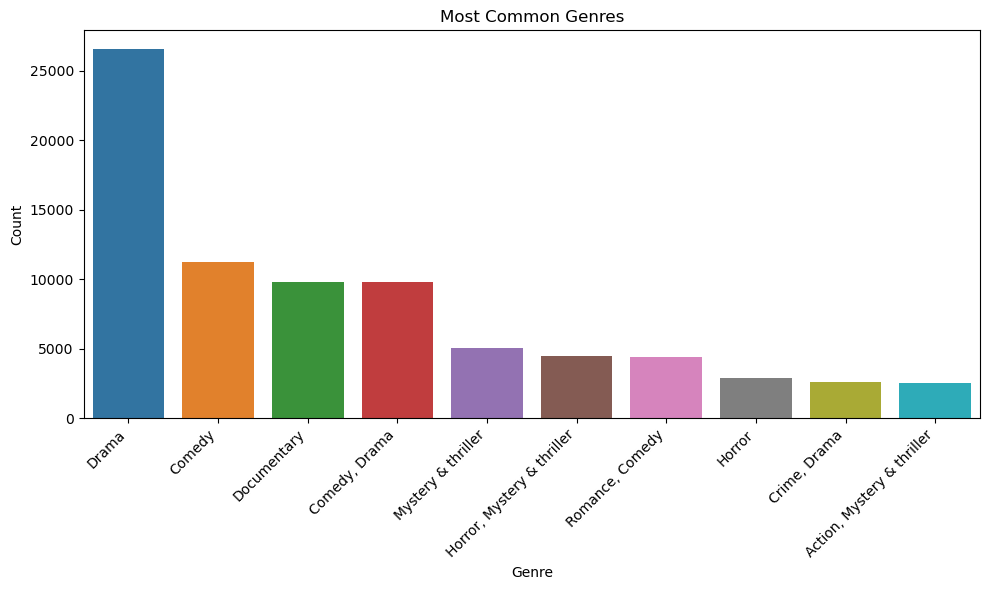

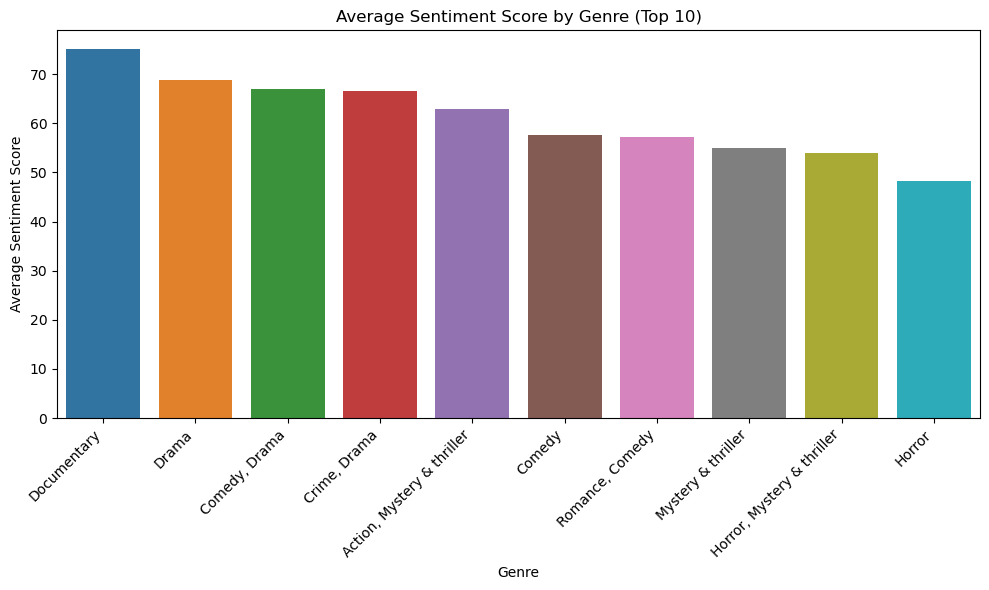

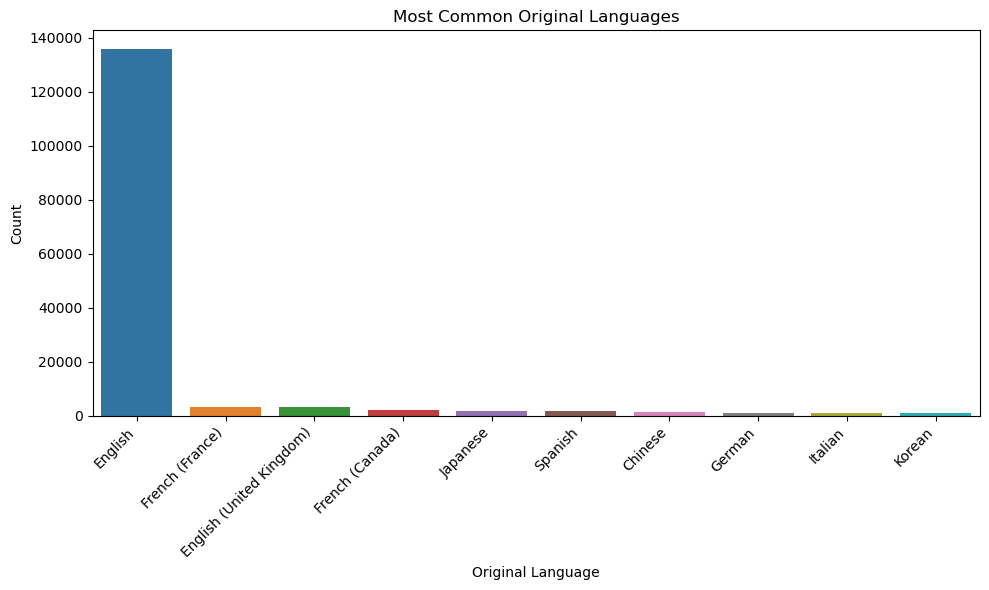

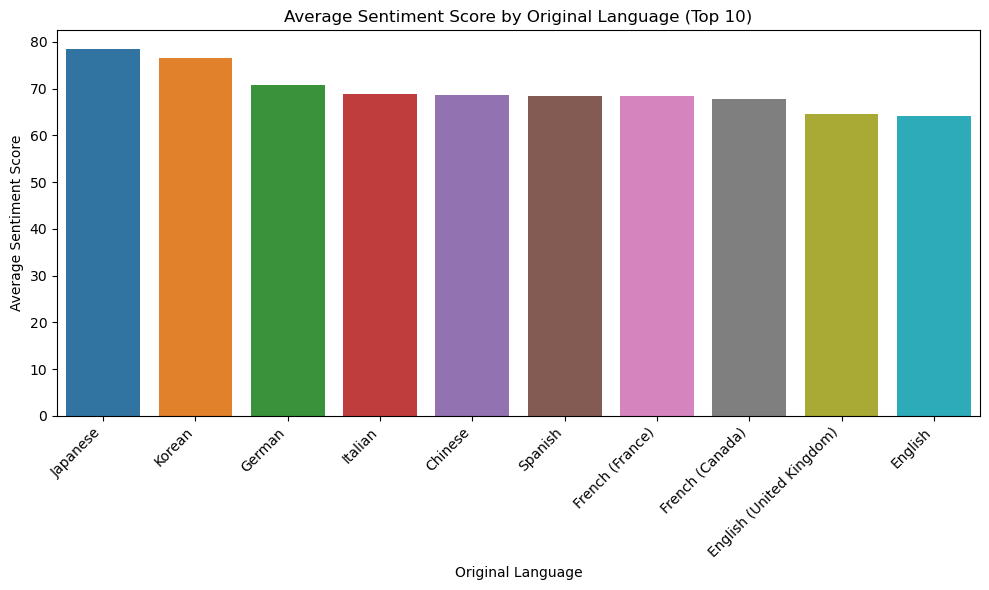

/tmp/ipykernel_20/1755020411.py:64: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


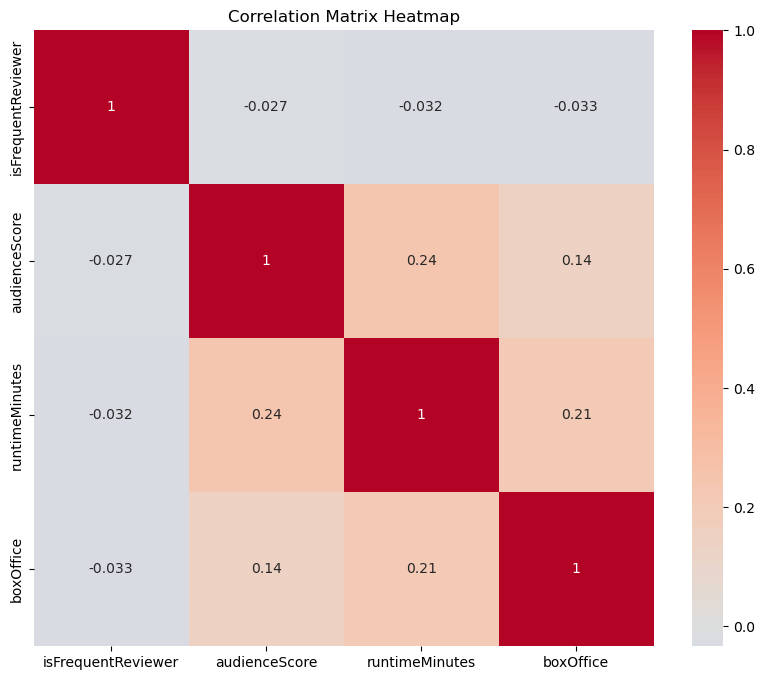

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'audienceScore' is the sentiment score, update the column name if needed
sentiment_score_column = 'audienceScore'

# Most common genres
most_common_genres = merged_data['genre'].value_counts().nlargest(10)
top_10_genres_data = merged_data[merged_data['genre'].isin(most_common_genres.index)]

# Plot the most common genres
plt.figure(figsize=(10, 6))
sns.barplot(x=most_common_genres.index, y=most_common_genres.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Most Common Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check the average sentiment score by genre for the top 10 genres
average_score_by_genre = top_10_genres_data.groupby('genre')[sentiment_score_column].mean().sort_values(ascending=False)

# Plot the average sentiment score by genre for the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=average_score_by_genre.index, y=average_score_by_genre.values)
plt.xlabel('Genre')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Genre (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Most common original languages
most_common_languages = merged_data['originalLanguage'].value_counts().nlargest(10)
top_10_languages_data = merged_data[merged_data['originalLanguage'].isin(most_common_languages.index)]

# Plot the most common original languages
plt.figure(figsize=(10, 6))
sns.barplot(x=most_common_languages.index, y=most_common_languages.values)
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.title('Most Common Original Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check the average sentiment score by originalLanguage for the top 10 languages
average_score_by_language = top_10_languages_data.groupby('originalLanguage')[sentiment_score_column].mean().sort_values(ascending=False)

# Plot the average sentiment score by originalLanguage for the top 10 languages
plt.figure(figsize=(10, 6))
sns.barplot(x=average_score_by_language.index, y=average_score_by_language.values)
plt.xlabel('Original Language')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by Original Language (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a correlation matrix
correlation_matrix = merged_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# we first identify the top 10 most common genres and original languages. 
# Then, we filter the data to include only those movies that belong to the top 10 genres and top 10 original languages. 
# We calculate and plot the average audience score for each genre and original language within the top 10 most common ones.
# This allows us to focus on the sentiment score analysis for the most prevalent genres and languages in the dataset.
# t will also create a correlation matrix heatmap to show the relationships between different numerical variables in your dataset. 


In [37]:
test_merged = pd.merge(test_data, movies_data, on='movieid', how='left')
# It is used to merge two DataFrames, test_data and movies_data, based on a common column 'movieid' using a left join operation. 
# The resulting merged data is stored in a new DataFrame called merged_data.


In [38]:
test_merged.describe()

,audienceScore,runtimeMinutes
count,50384.000000,54053.000000
mean,65.000179,106.149039
std,20.108764,22.146178
min,0.000000,4.000000
25%,50.000000,93.000000
50%,68.000000,103.000000
75%,82.000000,117.000000
max,100.000000,561.000000


In [39]:
test_merged.info()
#This method is used to display a concise summary of the information test_merged.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieid               55315 non-null  object 
 1   reviewerName          55315 non-null  object 
 2   isTopCritic           55315 non-null  bool   
 3   reviewText            55315 non-null  object 
 4   title                 55315 non-null  object 
 5   audienceScore         50384 non-null  float64
 6   rating                31019 non-null  object 
 7   ratingContents        31019 non-null  object 
 8   releaseDateTheaters   41613 non-null  object 
 9   releaseDateStreaming  49341 non-null  object 
 10  runtimeMinutes        54053 non-null  float64
 11  genre                 54395 non-null  object 
 12  originalLanguage      54077 non-null  object 
 13  director              55315 non-null  object 
 14  boxOffice             35320 non-null  object 
 15  distributor        

In [40]:
# Assuming you already have a DataFrame named 'test_merged'
columns_to_keep = ['reviewText','rating','runtimeMinutes','audienceScore','genre','movieid','reviewerName','originalLanguage','isTopCritic','boxOffice']
test_merged.drop(columns=[col for col in test_merged.columns if col not in columns_to_keep], inplace=True)
# Thes are used to select and keep specific columns in the test_merged DataFrame while dropping all other columns that are not listed in the columns_to_keep list. 
# This is a way to subset the DataFrame and retain only the desired columns for further analysis or modeling.

In [41]:
test_merged.info()
#This method is used to display a concise summary of the information test_merged.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieid           55315 non-null  object 
 1   reviewerName      55315 non-null  object 
 2   isTopCritic       55315 non-null  bool   
 3   reviewText        55315 non-null  object 
 4   audienceScore     50384 non-null  float64
 5   rating            31019 non-null  object 
 6   runtimeMinutes    54053 non-null  float64
 7   genre             54395 non-null  object 
 8   originalLanguage  54077 non-null  object 
 9   boxOffice         35320 non-null  object 
dtypes: bool(1), float64(2), object(7)
memory usage: 4.3+ MB


In [42]:
test_merged.isnull().sum()
# This command is used to calculate the sum of missing values in each column of the DataFrame test_merged.

movieid                 0
reviewerName            0
isTopCritic             0
reviewText              0
audienceScore        4931
rating              24296
runtimeMinutes       1262
genre                 920
originalLanguage     1238
boxOffice           19995
dtype: int64

In [43]:
# Create a dictionary to specify the column name change
column_name_change = {'isTopCritic': 'isFrequentReviewer'}

# Use the rename method to rename the column
test_merged.rename(columns=column_name_change, inplace=True)

# **Missing Data:**

*  **Identify the percentage of missing data in each column.**
*  **Investigate if the missing data is random or if there are any patterns.**

Missing Data Percentage:
movieid                0.000000
reviewerName           0.000000
isFrequentReviewer     0.000000
reviewText             0.000000
audienceScore          8.914399
rating                43.922987
runtimeMinutes         2.281479
genre                  1.663202
originalLanguage       2.238091
boxOffice             36.147519
dtype: float64


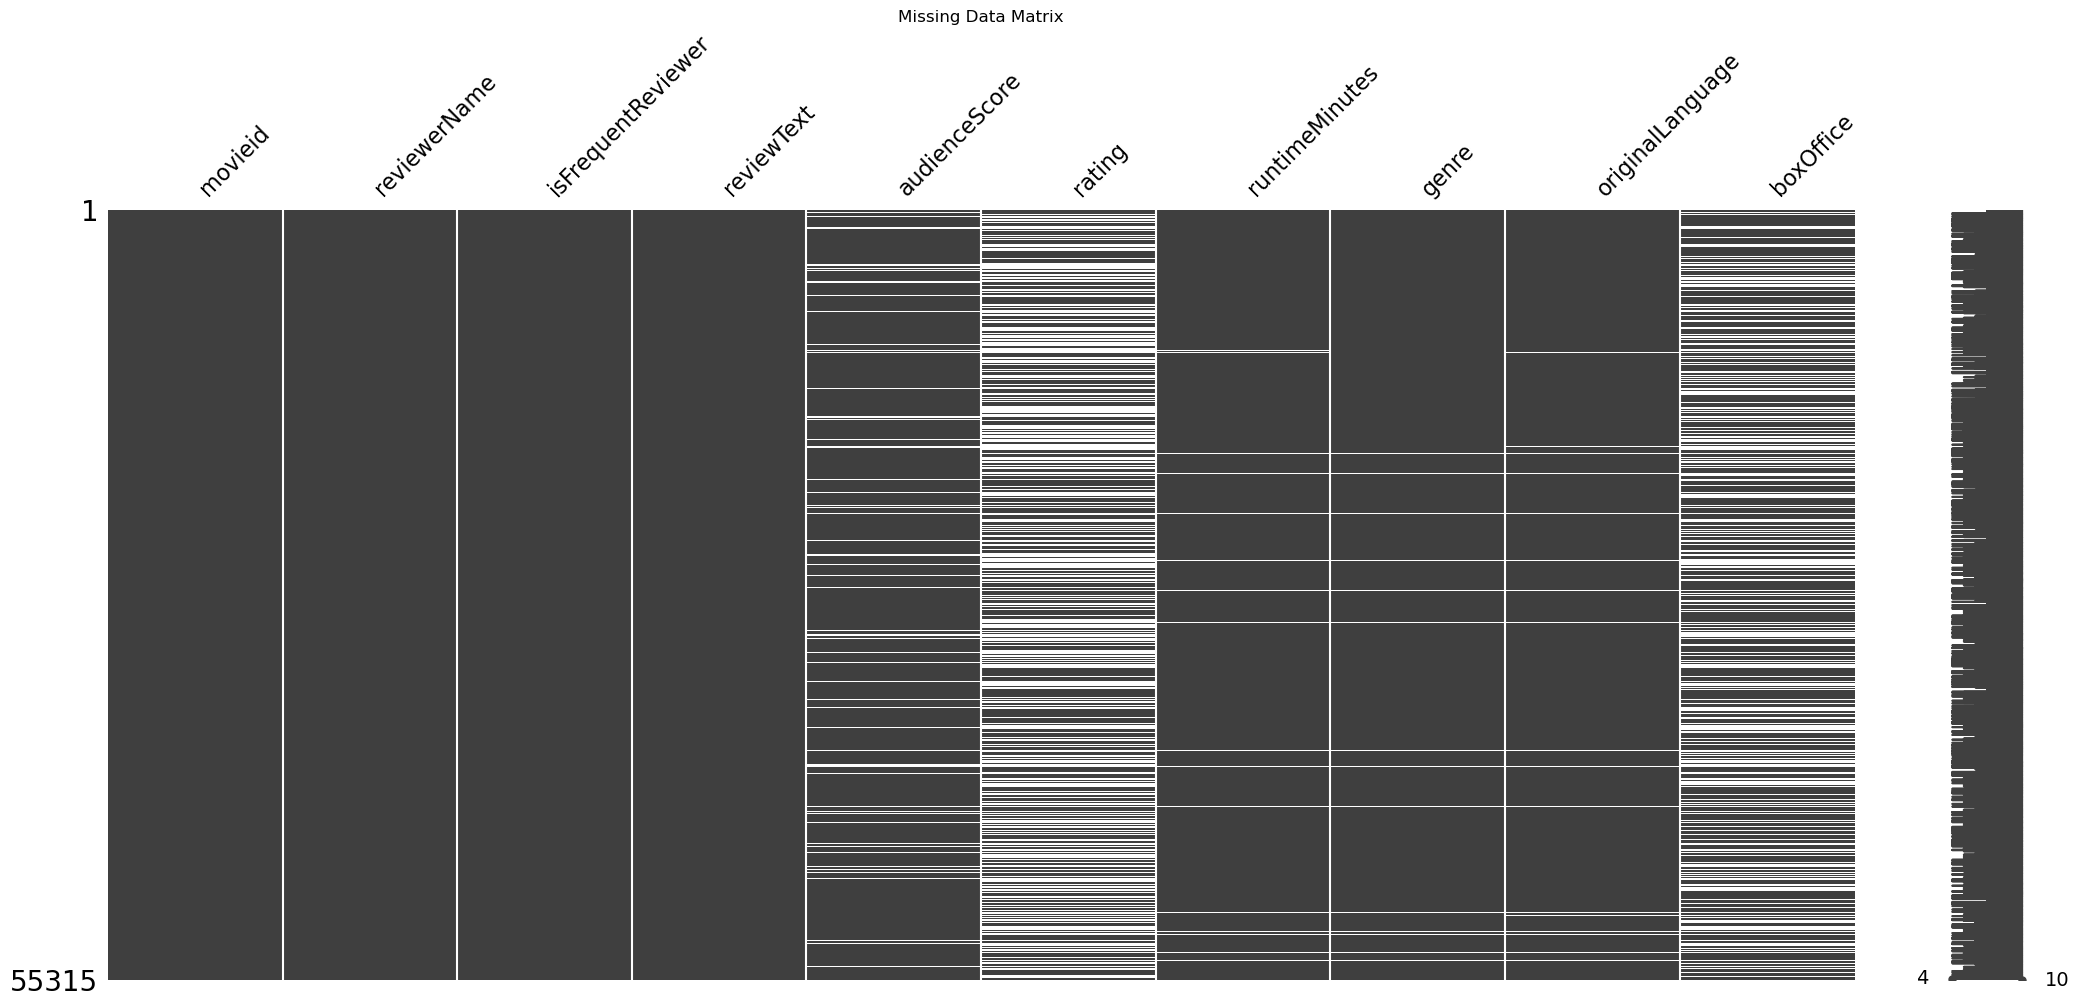

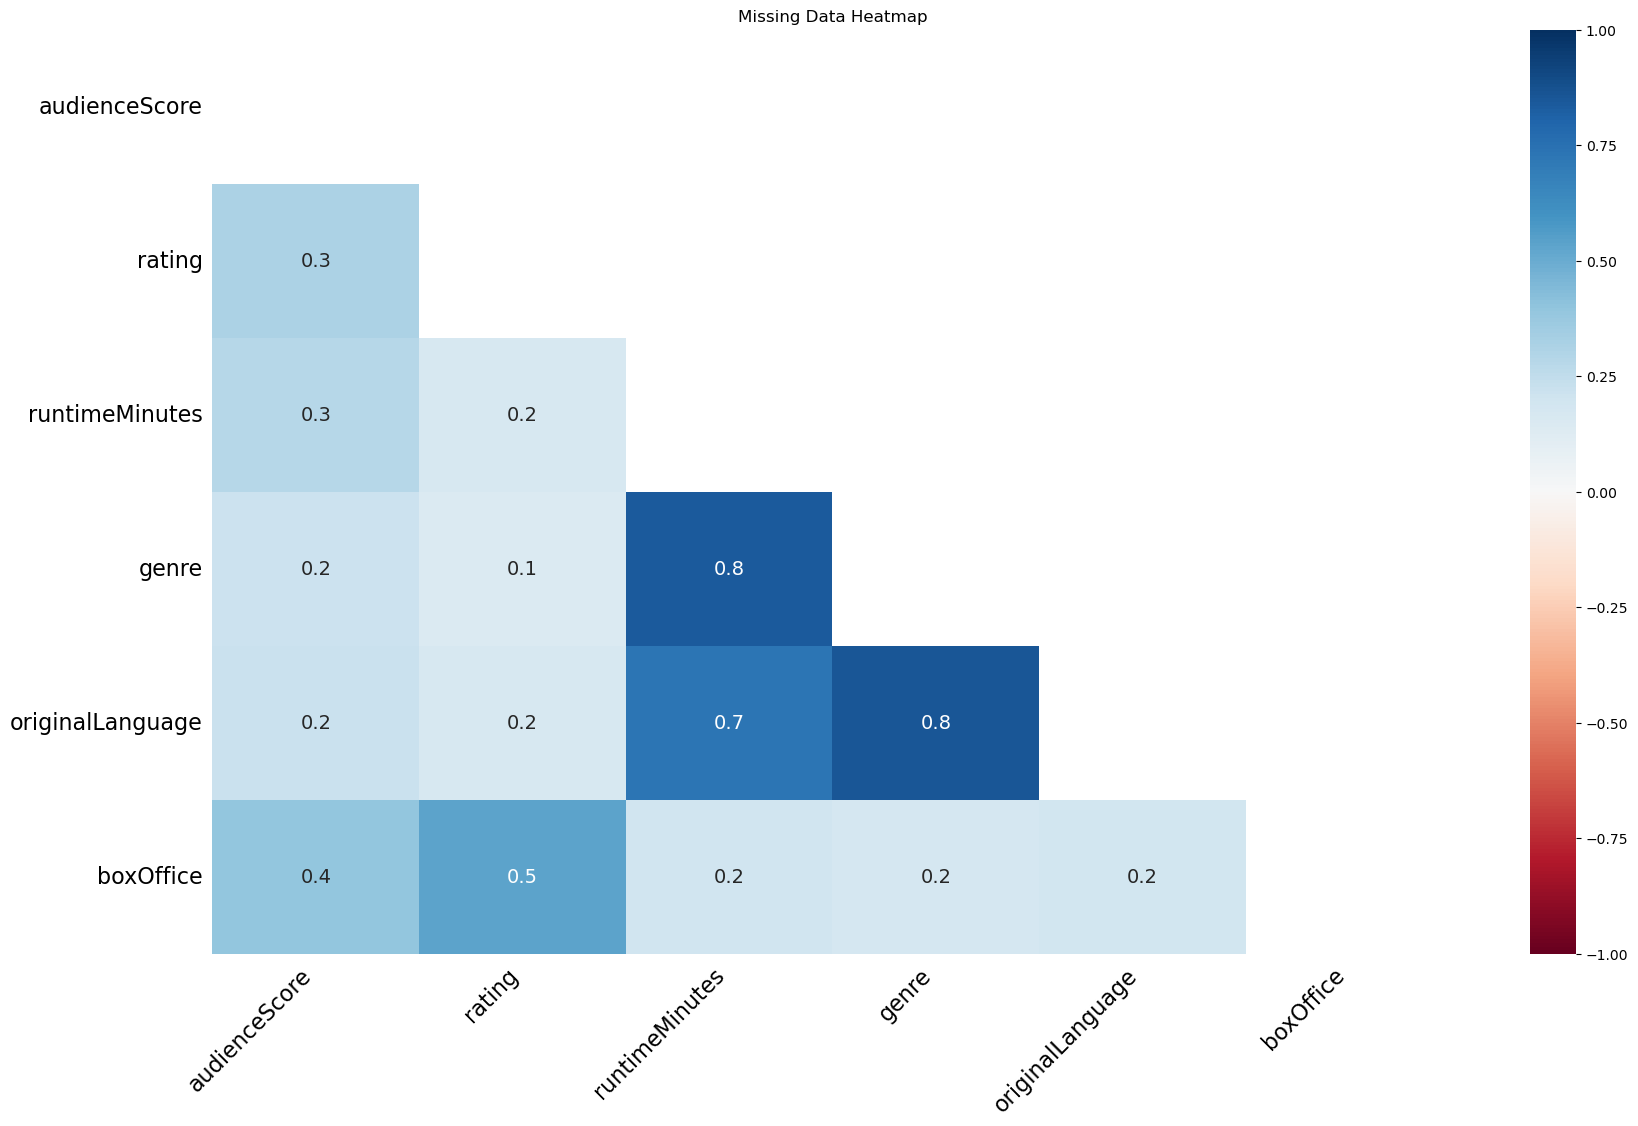

In [44]:

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


# Calculate the percentage of missing data in each column
missing_percentage = test_merged.isnull().sum() / len(test_merged) * 100

# Display missing data percentage
print("Missing Data Percentage:")
print(missing_percentage)

# Plot missing data matrix
msno.matrix(test_merged)
plt.title('Missing Data Matrix')
plt.show()

# Plot missing data heatmap
msno.heatmap(test_merged)
plt.title('Missing Data Heatmap')
plt.show()

# In this code, the msno.matrix() function creates a matrix plot that displays missing values in the dataset.
# Each column is represented by a vertical line where missing values are white, and non-missing values are black. T
# his visualization can help identify patterns or clusters of missing values.

# The msno.heatmap() function creates a heatmap that shows the correlation between missing values in different columns.
# This can help you understand if certain columns tend to have missing values together, indicating potential patterns.

# By using these visualizations, you can gain insights into the nature of missing data and whether there are any non-random patterns or correlations in the missing values.

# **Handling missing value **
* **audienceScore and runtimeMinutes are numerical columns**
* **rating,genre and originalLanguage are categorical columns**

In [45]:
# Define a function to convert box office strings to float
def convert_box_office(box_office_str):
    if isinstance(box_office_str, str) and box_office_str.endswith('M'):
        try:
            return float(box_office_str.replace('$', '').replace('M', ''))
        except ValueError:
            return None
    else:
        return None

# Apply the function to the 'boxOffice' column in the extracted DataFrame
test_merged['boxOffice'] = test_merged['boxOffice'].apply(convert_box_office)


In [46]:
test_merged.describe()

,audienceScore,runtimeMinutes,boxOffice
count,50384.000000,54053.000000,25631.000000
mean,65.000179,106.149039,64.377297
std,20.108764,22.146178,97.278451
min,0.000000,4.000000,1.000000
25%,50.000000,93.000000,8.000000
50%,68.000000,103.000000,30.900000
75%,82.000000,117.000000,75.500000
max,100.000000,561.000000,858.400000


In [47]:
test_merged.head()
# The describe() function in pandas is used to generate descriptive statistics of the data in a DataFrame.

,movieid,reviewerName,isFrequentReviewer,reviewText,audienceScore,rating,runtimeMinutes,genre,originalLanguage,boxOffice
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,57.0,R,111.0,"Holiday, Horror, Mystery & thriller",English,64.0
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...,86.0,PG,94.0,"Drama, Adventure",English,6.2
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...,62.0,NaN,NaN,Drama,French,NaN
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...,84.0,NaN,92.0,"Drama, Mystery & thriller",English,3.1
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...,NaN,NaN,66.0,"Drama, Musical",Arabic,NaN


In [48]:

# Impute numerical columns with mean
test_merged['audienceScore'].fillna(test_merged['audienceScore'].mean(), inplace=True)
test_merged['boxOffice'].fillna(test_merged['boxOffice'].mean(), inplace=True)
test_merged['runtimeMinutes'].fillna(test_merged['runtimeMinutes'].median(), inplace=True)

# Impute categorical columns with most frequent category
test_merged['rating'].fillna(test_merged['rating'].mode()[0], inplace=True)
test_merged['genre'].fillna(test_merged['genre'].mode()[0], inplace=True)
test_merged['originalLanguage'].fillna(test_merged['originalLanguage'].mode()[0], inplace=True)

# Verify that there are no missing values left
print(test_merged.isnull().sum())


movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
audienceScore         0
rating                0
runtimeMinutes        0
genre                 0
originalLanguage      0
boxOffice             0
dtype: int64


In [49]:
# from sklearn.impute import SimpleImputer

# # Create a SimpleImputer instance for numerical columns (using mean strategy)
# num_imputer = SimpleImputer(strategy='mean')

# # Create a SimpleImputer instance for categorical columns (using most frequent strategy)
# cat_imputer = SimpleImputer(strategy='most_frequent')

# # Impute numerical columns
# merged_data[['audienceScore', 'runtimeMinutes']] = num_imputer.fit_transform(test_merged[['audienceScore', 'runtimeMinutes']])

# # Impute categorical columns
# merged_data[['rating', 'genre', 'originalLanguage']] = cat_imputer.fit_transform(test_merged[['rating', 'genre', 'originalLanguage']])

# # Verify that there are no missing values left
# print(merged_data.isnull().sum())

# **Feature Analysis:**

* **Explore the distribution of isFrequentReviewer, rating, and  runtimeMinutes.**
* **Check if there are any correlations between these features and sentiment.**

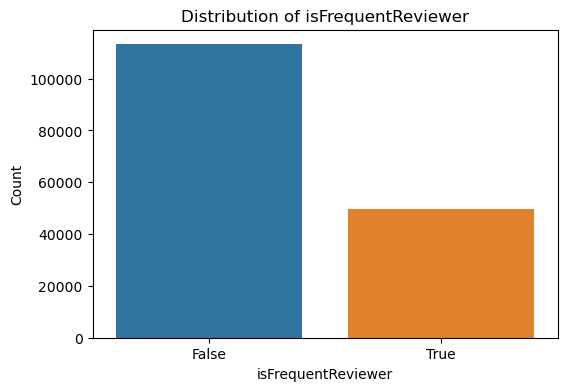

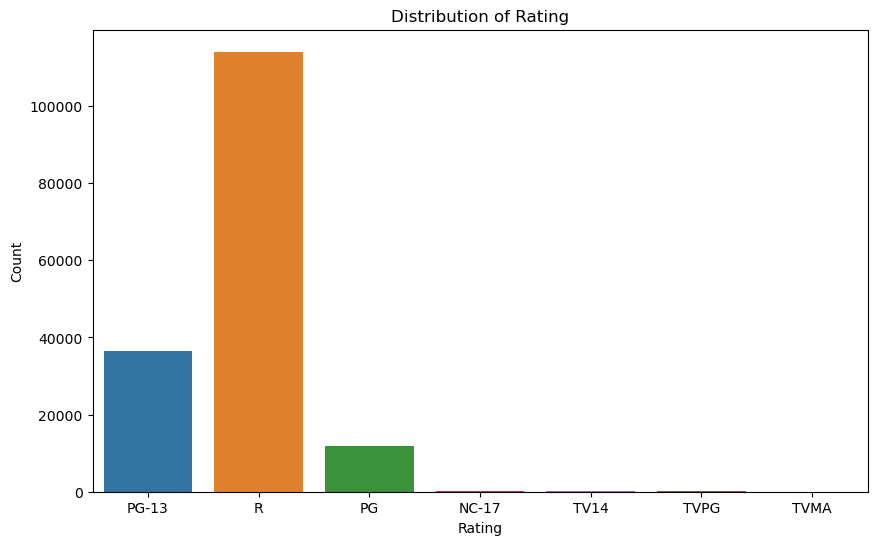

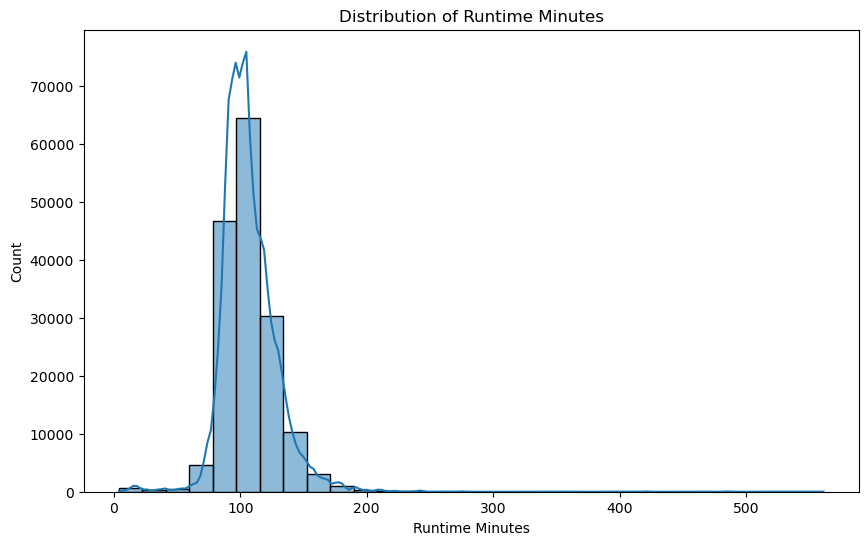

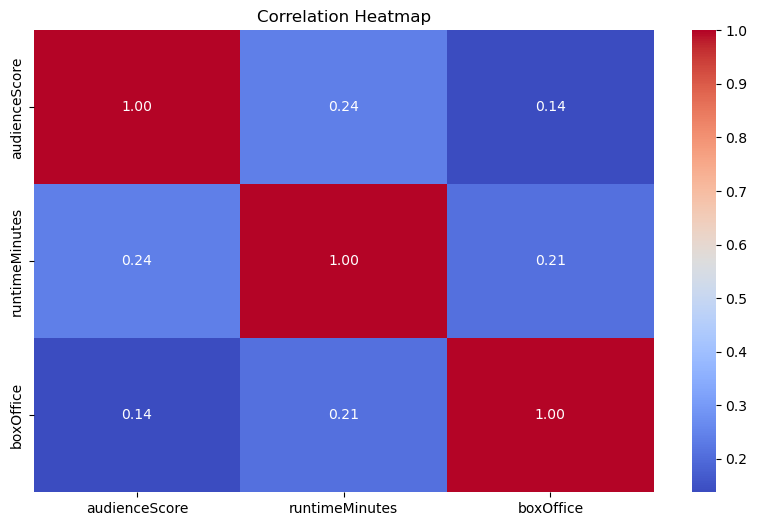

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Combine train and test merged data for overall analysis
merged= pd.concat([merged_data, test_merged], ignore_index=True)

# Feature Analysis

# Distribution of isFrequentReviewer
plt.figure(figsize=(6, 4))
sns.countplot(x='isFrequentReviewer', data=merged_data)
plt.xlabel('isFrequentReviewer')
plt.ylabel('Count')
plt.title('Distribution of isFrequentReviewer')
plt.show()

# Distribution of rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=merged_data)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Rating')
plt.show()

# Distribution of runtimeMinutes
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['runtimeMinutes'].dropna(), bins=30, kde=True)
plt.xlabel('Runtime Minutes')
plt.ylabel('Count')
plt.title('Distribution of Runtime Minutes')
plt.show()


# Correlations between features and sentiment
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#The code will display the distribution of isFrequentReviewer, rating, and runtimeMinutes using appropriate visualizations. 
#Additionally, it will show the correlation heatmap to check for any correlations between numerical features and sentiment. 
#The heatmap will indicate the degree of correlation between features, with positive values indicating a positive correlation and negative values indicating a negative correlation.

# **Rating Analysis:**

* **Examine the distribution of audience scores and ratings.**
* **Check if there is any relationship between ratings and sentiment.**

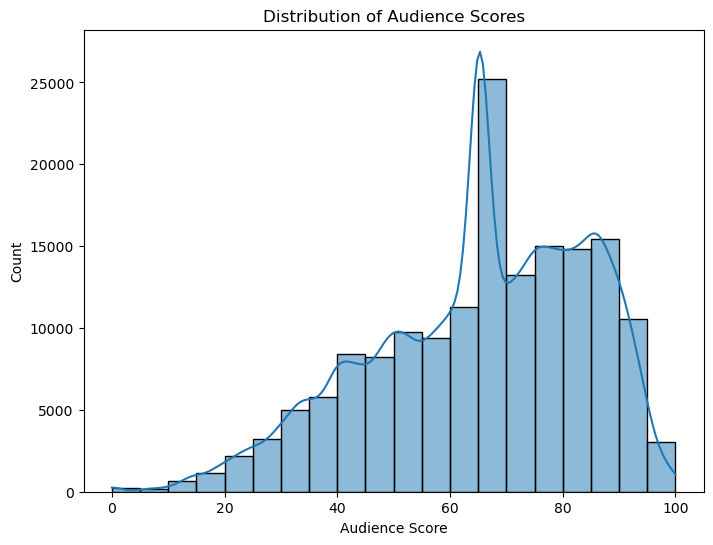

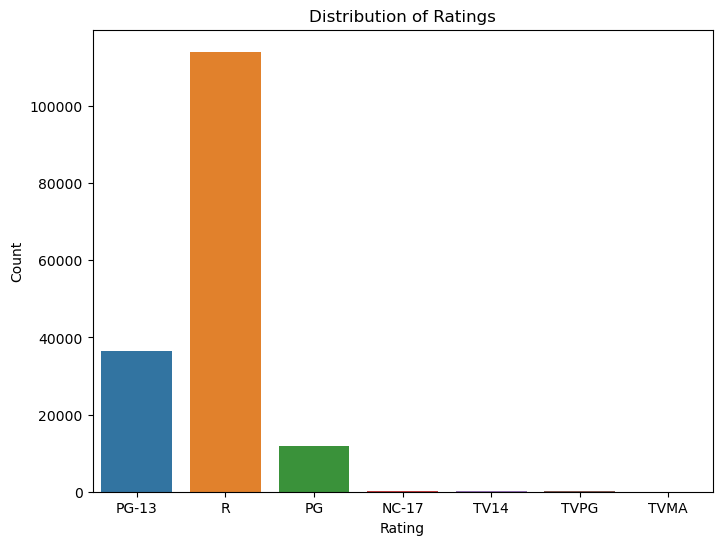

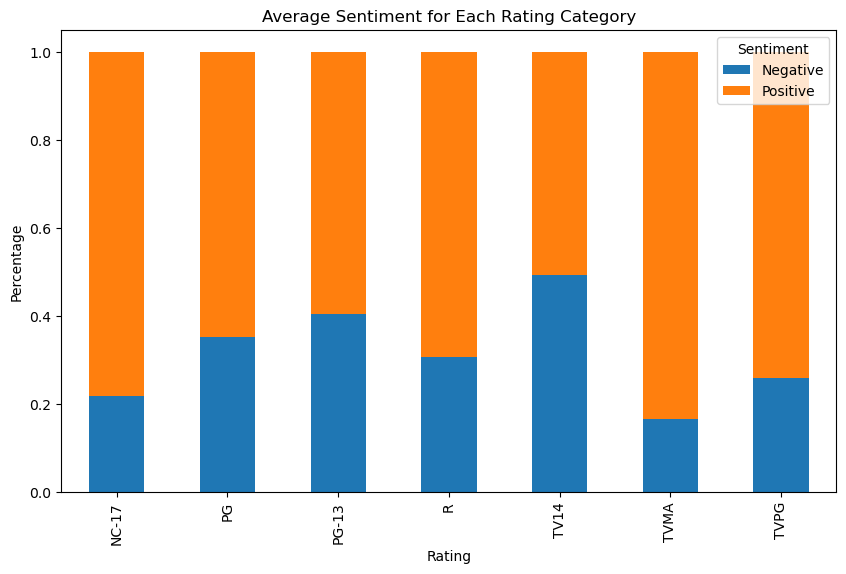

In [51]:
# Rating Analysis


# Combine train and test merged data for overall analysis
merged= pd.concat([merged_data, test_merged], ignore_index=True)

# Distribution of audience scores
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['audienceScore'].dropna(), bins=20, kde=True)
plt.xlabel('Audience Score')
plt.ylabel('Count')
plt.title('Distribution of Audience Scores')
plt.show()

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=merged_data)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

 #Average sentiment for each rating category
rating_sentiment_df = merged_data.groupby('rating')['sentiment'].value_counts(normalize=True).unstack()
rating_sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Average Sentiment for Each Rating Category')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Positive'])
plt.show()





#we calculate the average sentiment (as a percentage) for each rating category and then plot it using a stacked bar plot. 
#This plot will show the distribution of sentiment for each rating category, allowing us to observe any patterns or relationships between the two variables.

In [52]:
test_merged.head()
# this method is used to display the first few rows of the DataFrame train_data

,movieid,reviewerName,isFrequentReviewer,reviewText,audienceScore,rating,runtimeMinutes,genre,originalLanguage,boxOffice
0,legend_marty_mcfly_oracle,John Kim,False,Green slowly cranks up the dread with style an...,57.000000,R,111.0,"Holiday, Horror, Mystery & thriller",English,64.000000
1,terminator_katniss_everdeen_glimmer,Brian Chaney,False,Philip Noyce's direction is elegant and unforc...,86.000000,PG,94.0,"Drama, Adventure",English,6.200000
2,james_bond_labyrinth_gollum,Danielle Parker,False,It wouldn't do to say what path Maria ultimate...,62.000000,R,103.0,Drama,French,64.377297
3,v_quest_han_solo_wondrous,Brittany Lane,False,Pig is not exactly the arthouse John Wick that...,84.000000,R,92.0,"Drama, Mystery & thriller",English,3.100000
4,enigma_hulk_surreal_starlight,Justin Willis,False,An imaginative no-budget musical of sorts abou...,65.000179,R,66.0,"Drama, Musical",Arabic,64.377297


In [53]:

test_merged.info()
# this method is used to display a concise summary of the information about the DataFrame test_merged.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55315 entries, 0 to 55314
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieid             55315 non-null  object 
 1   reviewerName        55315 non-null  object 
 2   isFrequentReviewer  55315 non-null  bool   
 3   reviewText          55315 non-null  object 
 4   audienceScore       55315 non-null  float64
 5   rating              55315 non-null  object 
 6   runtimeMinutes      55315 non-null  float64
 7   genre               55315 non-null  object 
 8   originalLanguage    55315 non-null  object 
 9   boxOffice           55315 non-null  float64
dtypes: bool(1), float64(3), object(6)
memory usage: 4.3+ MB


In [54]:
test_merged.shape
# this command is used to retrieve the dimensions of the DataFrame test_merged.

(55315, 10)

In [55]:
merged_data.info()
# This method is used to display a concise summary of the information about the DataFrame merged_data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162758 entries, 0 to 162757
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieid             162758 non-null  object 
 1   reviewerName        162758 non-null  object 
 2   isFrequentReviewer  162758 non-null  bool   
 3   reviewText          162758 non-null  object 
 4   sentiment           162758 non-null  object 
 5   audienceScore       162758 non-null  float64
 6   rating              162758 non-null  object 
 7   runtimeMinutes      162758 non-null  float64
 8   genre               162758 non-null  object 
 9   originalLanguage    162758 non-null  object 
 10  boxOffice           162758 non-null  float64
dtypes: bool(1), float64(3), object(7)
memory usage: 13.8+ MB


# **Preprocessing of Text Column**

# **Running a loop on text_cols to turn them into lowercase **

In [56]:

# # Assuming text_cols is a list of column names that are text columns
Text_cols = ['movieid','reviewerName','genre','reviewText',]


for col in Text_cols:
    merged_data[col] = merged_data[col].apply(lambda x: x.lower() if type(x)==str else x)
    test_merged[col] = test_merged[col].apply(lambda x: x.lower() if type(x)==str else x)


# **punctuations and number removal **
**Applying the above function to the text columns of both train and test datasets**

In [57]:
# import string
# import re

# contractions_dictionary = {"ain't": "am not", "aren't": "are not", "can't": "cannot", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'll": "he will", "he's": "he is", "I'd": "I would", "I'll": "I will", "I'm": "I am", "I've": "I have", "isn't": "is not", "it's": "it is", "let's": "let us", "mightn't": "might not", "mustn't": "must not", "shan't": "shall not", "she'd": "she would", "she'll": "she will", "she's": "she is", "shouldn't": "should not", "that's": "that is", "there's": "there is", "they'd": "they would", "they'll": "they will", "they're": "they are", "they've": "they have", "we'd": "we would", "we'll": "we will", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what're": "what are", "what's": "what is", "what've": "what have", "where's": "where is", "who'd": "who would", "who'll": "who will", "who're": "who are", "who's": "who is", "who've": "who have", "won't": "will not", "wouldn't": "would not", "you'd": "you would", "you'll": "you will", "you're": "you are", "you've": "you have"}
# # Function to remove punctuations and numbers
# def remove_punctuations_and_numbers(text):
#      # Remove punctuation
#     text = text.translate(str.maketrans('', '', string.punctuation))
#      # Remove numbers
#     text = re.sub(r'\d+', '', text)

#     return text

#  # Function to expand contractions
# def expand_contractions(text, contractions_dictionary):
#     words = text.split()
#     expanded_words = [contractions_dictionary[word] if word in contractions_dictionary else word for word in words]
#     return " ".join(expanded_words)

#  # List of text columns in the datasets
# Text_cols = ['movieid','reviewerName','genre','reviewText','director',]

# # # Applying text preprocessing and contraction expansion functions to each text column
# for col in Text_cols:
#      # Removing punctuations and numbers
#     merged_data[col] = merged_data[col].apply(remove_punctuations_and_numbers)
#      # Applying the contraction expansion function
#     merged_data[col] = merged_data[col].apply(lambda x: expand_contractions(x, contractions_dictionary))

#      # For the test dataset, do the same:
#     test_merged[col] = test_merged[col].apply(remove_punctuations_and_numbers)
#     test_merged[col] = test_merged[col].apply(lambda x: expand_contractions(x, contractions_dictionary))


In [58]:
# # Writing a function to remove salutations from reviewerName and director columns
# def remove_salutation(text):
#     salutations = ['mr', 'mrs', 'miss', 'ms', 'dr', 'prof', 'rev', 'hon', 'sir', 'madam', 'mx']

#     words = text.split()
#     new_words = []

#     for word in words:
#         if word in salutations:
#             pass
#         else:
#             new_words.append(word)
#     return " ".join(new_words)

In [59]:
# # apply remove_salute function to 'reviewerName' and 'director' columns in df_train and df_test dataframes
# merged_data['reviewerName']=merged_data['reviewerName'].apply(remove_salutation)
# merged_data['director'] =merged_data['director'].apply(remove_salutation)
# test_merged['reviewerName'] = test_merged['reviewerName'].apply(remove_salutation)
# test_merged['director'] = test_merged['director'].apply(remove_salutation)

In [60]:
# # function to remove stop words
# def remove_stopwords(text):
#     # some common stop words after removing 'not'
#     eng_words = [
#     'a', 'an', 'the', 'in', 'on', 'at', 'for', 'of', 'to', 'with', 'by', 'is', 'am',
#     'are', 'was', 'were', 'be', 'being', 'been', 'I', 'you', 'he', 'she', 'it', 'we',
#     'they', 'my', 'your', 'his', 'her', 'its', 'our', 'their', 'mine', 'yours', 'hers',
#     'ours', 'theirs', 'this', 'that', 'these', 'those', 'which', 'who', 'whom', 'whose',
#     'what', 'when', 'where', 'why', 'how', 'some', 'any','only',
#     'own', 'same', 'so', 'such', 'than', 'too', 'very', 'can', 'will', 'shall', 'could',
#     'would', 'should', 'might', 'must', 'ought', 'do', 'does', 'did', 'doing', 'done',
#     'has', 'have', 'having', 'had', 'if', 'unless', 'until', 'while', 'as', 'because',
#     'since', 'though', 'although', 'before', 'after', 'till', 'when', 'where', 'whether',
#     'either', 'neither', 'both', 'each', 'every', 'so', 'such', 'than', 'that', 'though',
#     'whether', 'while', 'who', 'whom', 'whose', 'which', 'what', 'how', 'why', 'but',
#     'and', 'or', 'yet', 'so', 'because', 'since', 'while', 'although', 'though', 'unless']

#     words = text.split()
#     new_words = []

#     for word in words:
#         if word in eng_words:
#             pass
#         else:
#             new_words.append(word)
#     return " ".join(new_words)

In [61]:
# apply remove_stopwords function to 'reviewText' column in df_train and df_test dataframes
# merged_data['reviewText'] = merged_data['reviewText'].apply(remove_stopwords)
# test_merged['reviewText'] = test_merged['reviewText'].apply(remove_stopwords)

#  **Base Model 1 Logistic Regression**

In [62]:
# Importing necessary libraries
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

# Split the dataset into features (X) and labels (y)
X = merged_data.drop(['sentiment'], axis=1)
y = merged_data['sentiment']

# Convert string labels to numeric labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Num_cols = ['audienceScore','runtimeMinutes','boxOffice']
Text_cols = ['movieid','reviewerName','genre','reviewText',]
Cat_cols = ['isFrequentReviewer','rating','originalLanguage']
Target_cols = ['sentiment']

# creating column transformer
ct= ColumnTransformer([
    ('scaler', MinMaxScaler(), ['audienceScore']),
    ('scaler2',RobustScaler(),['runtimeMinutes']),
    ('scaler3',MinMaxScaler(),['boxOffice']),
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2)), 'reviewText'),('text1', TfidfVectorizer(), 'reviewerName'),
        ('text3', TfidfVectorizer(), 'genre'),('text4', TfidfVectorizer(), 'movieid'),
    ('onehot', OneHotEncoder(handle_unknown='ignore'), Cat_cols)])


pipe1 = Pipeline([
    ('column_transformer', ct),
    #('classifier', LinearSVC(random_state=42,max_iter=5000))  
    ('logistic', LogisticRegression(random_state=42,max_iter=5000))
    #('logistic', LogisticRegression(solver='saga', max_iter=1500, random_state=42,penalty='l2',C=6))
    #('Classifier', LinearSVC(C=6, random_state=42,max_iter=5000))
])




pipe1.fit(X_train,y_train)
y_pred1 = pipe1.predict(X_test)

# **Learning and Key Points**
**These ideas collectively illustrate the process of building a machine learning pipeline for sentiment analysis. They highlight the importance of data preprocessing, model selection, feature engineering, evaluation, and continuous experimentation to create effective predictive models.It's important to note that while the code is set up for performing these tasks, the comments indicate that there might be alternative approaches and classifier choices that can be explored. Additionally, performance evaluation and tuning of hyperparameters are essential steps to ensure that the model performs effectively on the task of sentiment analysis. The code provides a good starting point, but further experimentation and analysis would likely be needed for optimal results.**

In [63]:
y_pred1

array([1, 0, 0, ..., 1, 1, 0])

In [64]:
y_test

array([1, 0, 0, ..., 1, 1, 1])

In [65]:
# checking the f1 score for both test and train
print('Train f1 score: ',f1_score(y_train, pipe1.predict(X_train)))
print('Test f1 score: ',f1_score(y_test, y_pred1))

Train f1 score:  0.9360828892703575
Test f1 score:  0.8787091661530334


# **Log_Reg (Logistic Regression):**

* **Train Score: 0.9367**
* **Test Score: 0.8787**
* **Insights: This model has a solid overall performance, with a relatively high train score compared to the test score.**
* **This indicates a good balance between fitting the training data and generalizing to the test data.**

In [66]:
# Get the transformed data after the ColumnTransformer step
transformed_data = pipe1.named_steps['column_transformer'].transform(X_train)

# Print the shape of the transformed data
print("Shape of transformed data:", transformed_data.shape)

Shape of transformed data: (130206, 952038)


# **Feature are quite high feature reduction technique will be tried to reduce dimensionality**

In [67]:
# Classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72     10696
           1       0.85      0.91      0.88     21856

    accuracy                           0.83     32552
   macro avg       0.82      0.79      0.80     32552
weighted avg       0.83      0.83      0.83     32552



In [68]:
# output = {'Log_Reg':{'Train':0.9370,'Test':0.8787}}

In [69]:
# confusion matrix
CM_LR = confusion_matrix(y_test,y_pred1)
print(CM_LR)

[[ 7083  3613]
 [ 1897 19959]]


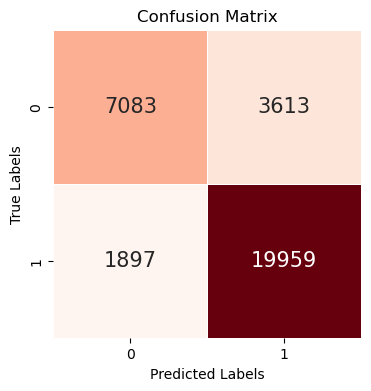

In [70]:

# Plotting confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
sns.heatmap(CM_LR, annot=True, fmt="d", cmap="Reds", cbar=False,
            annot_kws={"size": 15}, linewidths=0.5, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# **PRC AND ROC CURVE**

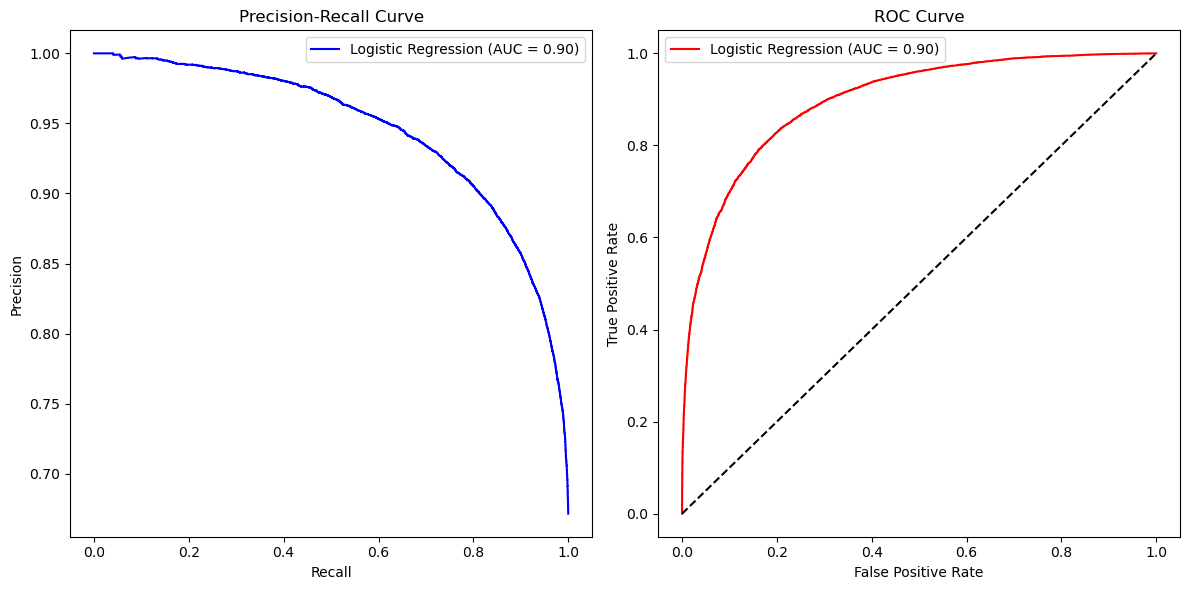

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate predicted probabilities for the positive class
y_pred_prob1 = pipe1.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_prob1)

# Calculate ROC Curve
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(recall1, precision1, color='b', label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr1, tpr1, color='r', label=f'Logistic Regression (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

# **Pipeline with Feature Reduction**

In [72]:
from sklearn.decomposition import TruncatedSVD

 #Create the pipeline with ColumnTransformer, Truncated SVD, and Logistic Regression
pipe2 = Pipeline([
    ('column_transformer', ct),
    ('svd', TruncatedSVD(n_components=1000)),  # Reduce the number of features
    ('logistic', LogisticRegression(random_state=42, max_iter=500))
])

# Fit the pipeline on the training data
pipe2.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['audienceScore']),
                                                 ('scaler2', RobustScaler(),
                                                  ['runtimeMinutes']),
                                                 ('scaler3', MinMaxScaler(),
                                                  ['boxOffice']),
                                                 ('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'reviewText'),
                                                 ('text1', TfidfVectorizer(),
                                                  'reviewerName'),
                                                 ('text3', TfidfVectorizer(),
                                                  'genre'),
                                                 ('text4', TfidfVectorizer(),
                                                  'movieid'),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['isFrequentReviewer',
                                                   'rating',
                                                   'originalLanguage'])])),
                ('svd', TruncatedSVD(n_components=1000)),
                ('logistic',
                 LogisticRegression(max_iter=500, random_state=42))])

# **Learning and Key Points**
**The main idea behind adding TruncatedSVD is to reduce the dimensionality of the transformed features before passing them to the classifier. This can be especially useful when dealing with high-dimensional data, like text data transformed using TF-IDF, as it can help mitigate the curse of dimensionality and potentially improve model performance and efficiency.**

**After training pipe2, you could use it to make predictions on the test data and evaluate its performance, similar to what you did with pipe1.**

In [73]:
# Predicting on test
y_pred2 = pipe2.predict(X_test)

# checking the f1 score for both test and train
print('Train f1 score: ',f1_score(y_train, pipe2.predict(X_train)))
print('Test f1 score: ',f1_score(y_test, y_pred2))

Train f1 score:  0.8219144345516941
Test f1 score:  0.8228849146292072


In [74]:
# Classification report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.66      0.46      0.54     10696
           1       0.77      0.88      0.82     21856

    accuracy                           0.74     32552
   macro avg       0.71      0.67      0.68     32552
weighted avg       0.73      0.74      0.73     32552



In [75]:
# output['Log_Reg_FR'] = {'Train': 0.8223, 'Test': 0.8231}

# **PRC AND ROC CURVE**

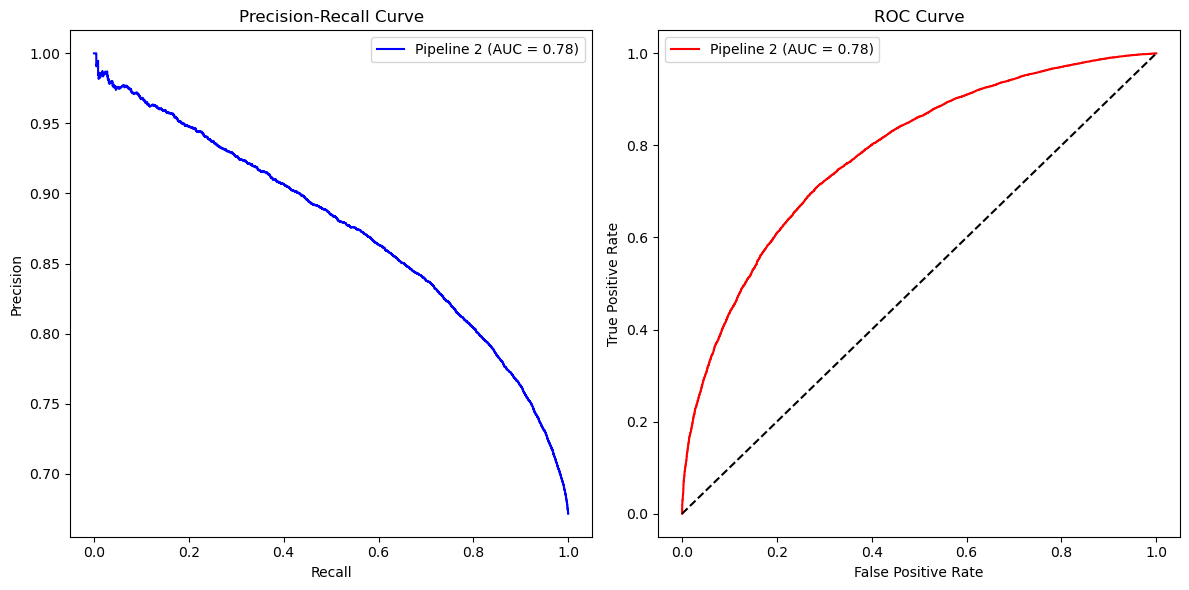

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate predicted probabilities for the positive class
y_pred_prob2 = pipe2.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curve
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_prob2)

# Calculate ROC Curve
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)

# Plot Precision-Recall Curve and ROC Curve
plt.figure(figsize=(12, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall2, precision2, color='b', label=f'Pipeline 2 (AUC = {roc_auc2:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr2, tpr2, color='r', label=f'Pipeline 2 (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

# **Log_Reg_FR (Logistic Regression with Feature Reduction):**

* **Train Score: 0.8148**
* **Test Score: 0.8116**
* **Insights: This model's train and test scores are close, which suggests that it is performing consistently across both datasets.**
* **However, the scores are lower compared to some other models.**

# **Pipeline with HyperparameterTuning**

In [77]:

  pipe1_hpt = Pipeline([
      ('column_transformer', ct),
      ('logistic', LogisticRegression(solver='saga', max_iter=1500, random_state=42,penalty='l2',C=0.2))
])


# Assuming you have your 'ct' column transformer defined elsewhere

# Create the pipeline
# pipe1_hpt = Pipeline([
#     ('column_transformer', ct),
#     ('logistic', LogisticRegression(solver='lbfgs', max_iter=1500, random_state=42, penalty='l2', C=1.2))
# ])


# **RandomizedSearchCV**

In [78]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# # Define the parameter distributions for randomized search
# param_dist = {
#     'logistic__C': [1,1.2,10]
#     'logistic__penalty': ['l1', 'l2'],
#    'logistic__solver': ['liblinear', 'saga']
# }

# # Create a RandomizedSearchCV object
# randomized_search = RandomizedSearchCV(pipe1_hpt, param_distributions=param_dist, n_iter=10, cv=5, random_state=42,C=5,scoring='f1', n_jobs=-1)

# # Fit the randomized search to your data
# randomized_search.fit(X_train, y_train)

# Getting best hyperparameters and the corresponding F1 score
#best_params = random_search.best_params_
#best_f1_score = random_search.best_score_

#print("Best hyperparameters for pipe1:", best_params)
#print("Best F1 score for pipe1:", best_f1_score)


**Best hyperparameters for pipe1: {'logistic__C': 1.0, 'logistic__penalty': 'l2',logistic__solver='saga'}**

**Best F1 score for pipe1: 0.8787**

In [79]:
# fitting to data
pipe1_hpt.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['audienceScore']),
                                                 ('scaler2', RobustScaler(),
                                                  ['runtimeMinutes']),
                                                 ('scaler3', MinMaxScaler(),
                                                  ['boxOffice']),
                                                 ('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'reviewText'),
                                                 ('text1', TfidfVectorizer(),
                                                  'reviewerName'),
                                                 ('text3', TfidfVectorizer(),
                                                  'genre'),
                                                 ('text4', TfidfVectorizer(),
                                                  'movieid'),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['isFrequentReviewer',
                                                   'rating',
                                                   'originalLanguage'])])),
                ('logistic',
                 LogisticRegression(C=0.2, max_iter=1500, random_state=42,
                                    solver='saga'))])

In [80]:
# # Predicting on test
y_pred1_hpt = pipe1_hpt.predict(X_test)

# # checking the f1 score for both test and train
print('Train f1 score: ',f1_score(y_train, pipe1_hpt.predict(X_train)))
print('Test f1 score: ',f1_score(y_test, y_pred1_hpt))

Train f1 score:  0.8852499770316208
Test f1 score:  0.864159993148045


In [81]:
# output['LogReg_hpt'] = {'Train': 0.8852, 'Test': 0.8641}

# **LogReg_hpt (Logistic Regression with Hyperparameter Tuning):**

* **Train Score: 0.8852**
* **Test Score: 0.8641**
* **Insights: This model demonstrates strong performance, with a high train score and a competitive test score.** 
* **The test score is close to the train score, indicating that the model is likely well-generalized.**

In [82]:
# confusion matrix
# CM_LR = confusion_matrix(y_test,y_pred1_hpt)
print(CM_LR)

[[ 7083  3613]
 [ 1897 19959]]


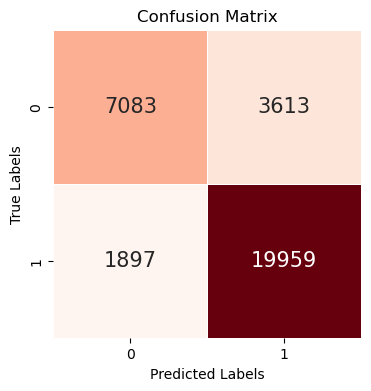

In [83]:

# # Plotting confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(CM_LR, annot=True, fmt="d", cmap="Reds", cbar=False,
            annot_kws={"size": 15}, linewidths=0.5, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [84]:
y_pred2=pipe1_hpt.predict(test_merged)

In [85]:
y_pred2

array([1, 1, 1, ..., 1, 1, 0])

# **PRC AND ROC CURVE**

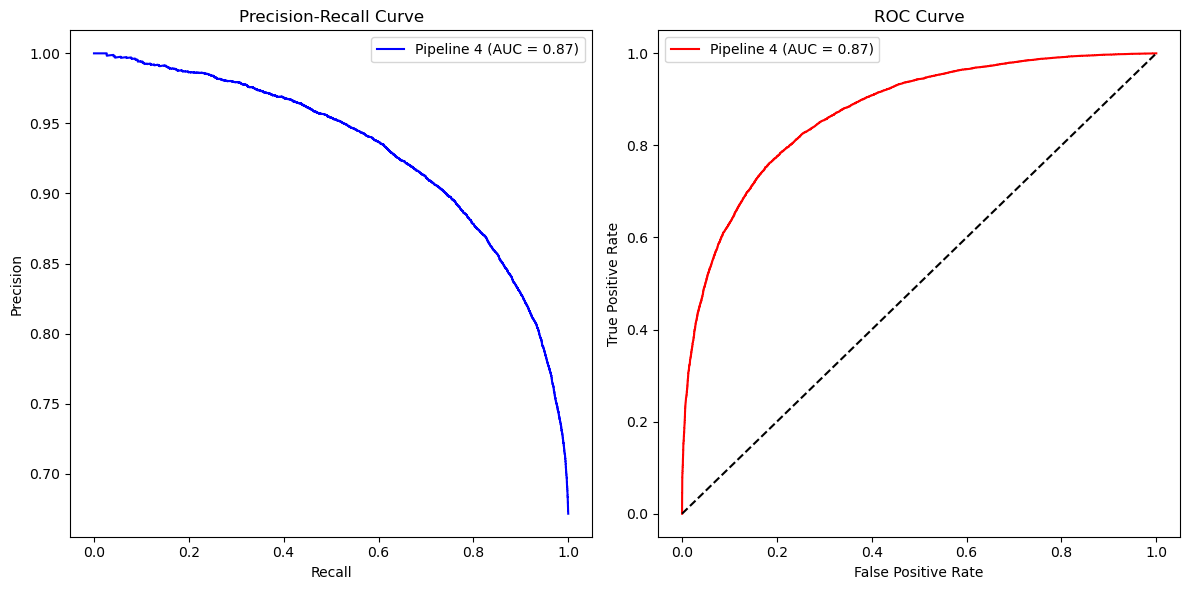

In [86]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate predicted decision scores for the LinearSVC model
decision_scores = pipe1_hpt.decision_function(X_test)

# Calculate Precision-Recall Curve
precision4, recall4, _ = precision_recall_curve(y_test, decision_scores)

# Calculate ROC Curve
fpr4, tpr4, _ = roc_curve(y_test, decision_scores)
roc_auc4 = auc(fpr4, tpr4)

# Plot Precision-Recall Curve and ROC Curve
plt.figure(figsize=(12, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall4, precision4, color='b', label=f'Pipeline 4 (AUC = {roc_auc4:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr4, tpr4, color='r', label=f'Pipeline 4 (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [87]:

# submission=pd.DataFrame(columns=['id','sentiment'])
# submission['id']=[i for i in range(len(y_pred2))]
# submission['sentiment']=label_encoder.inverse_transform(y_pred2)

In [88]:
# submission.to_csv('submission.csv', index=False,encoding = 'utf-8')

In [89]:
# print(submission.head())
# submission.shape

# **Learning and Key Points**
**The main idea behind pipe1_hpt is to apply hyperparameter tuning to the Logistic Regression classifier to potentially improve its performance. Hyperparameter tuning involves searching for the best combination of hyperparameters that leads to the optimal model performance. The specific hyperparameters tuned in this case (solver, max_iter, penalty, and C) are chosen to adjust the behavior and regularization of the Logistic Regression algorithm.**

**After training pipe1_hpt, you can use it to make predictions on the test data and evaluate its performance. Keep in mind that hyperparameter tuning can significantly impact model performance, so evaluating the tuned model's results is crucial.**

# **Feature Importance with Random Forest**

**Overall, this code is a pipeline for preprocessing data, training a random forest classifier, and visualizing feature importances to understand the significance of different features in the predictive model.**

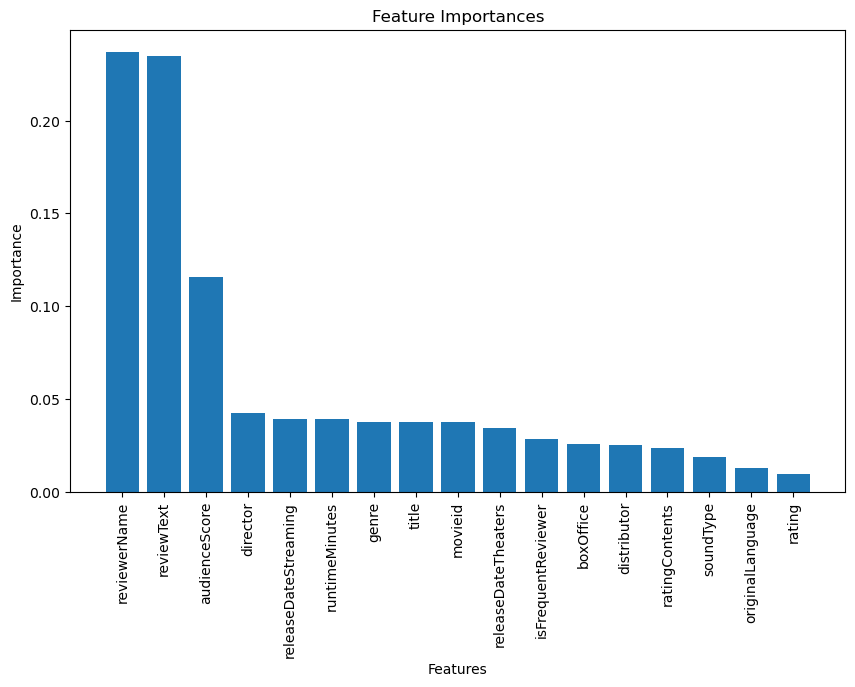

In [90]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Read the data
train = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
movies = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
test = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

# Engineer a new feature 'isFrequentReviewer' from an existing column
test['isFrequentReviewer'] = test['isTopCritic']

# Remove duplicate movie entries
movies = movies.drop_duplicates(subset='movieid')

# Merge the 'train' dataset with 'movies' using 'movieid' as the key
train = pd.merge(train, movies, on='movieid', how='inner')

# Separate the target variable ('sentiment') from the feature set
ytrain = train['sentiment']
train = train.drop(['sentiment'], axis=1)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
columns_to_impute = ['audienceScore', 'runtimeMinutes']
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])

# Identify numeric and categorical columns
num_cols = train.select_dtypes(include=['float64']).columns
cat_cols = train.select_dtypes(include=['object', 'bool']).columns

# Impute remaining missing values
train[num_cols] = train[num_cols].fillna(train[num_cols].mean())
train[cat_cols] = train[cat_cols].fillna('')

# Encode categorical columns using OrdinalEncoder
encoder = OrdinalEncoder()
train[cat_cols] = encoder.fit_transform(train[cat_cols])

# Create a Random Forest model and fit it to the data
model = RandomForestClassifier(random_state=42)
model.fit(train, ytrain)

# Extract feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Create a list of all column names in the 'train' DataFrame
all_cols = list(train.columns)

# Create a DataFrame to store feature importances with their corresponding columns
importance_df = pd.DataFrame({'Feature': all_cols, 'Importance': feature_importances})

# Sort the importance DataFrame by Importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot a bar chart to visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()


# **Base Model 2 LinearSVC**

In [91]:
# from sklearn.svm import LinearSVC

# # We have already defined ct1 in code above # Creating the pipeline pipe3 with LinearSVC as the estimator and ct1 as the ColumnTransformer
pipe3 = Pipeline([
    ('preprocess', ct),           # Apply the ColumnTransformer 'ct1'
    ('classifier', LinearSVC(random_state=42,max_iter=5000))    # Use LinearSVC as the classifier
])

# **Learning and Key Points**
**The LinearSVC aims to learn a linear decision boundary that best separates the two classes in the input data space. It's worth noting that linear classifiers are simple yet effective models that work well when the data is linearly separable. However, if the data is complex or not linearly separable, a more complex model or non-linear transformation might be needed for better performance.**

**The pipeline created (pipe3) is designed for a binary classification task. The general idea is to preprocess the input data using the specified transformations defined in the ColumnTransformer, and then train a linear Support Vector Classifier (LinearSVC) on the preprocessed data.**

In [92]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['audienceScore']),
                                                 ('scaler2', RobustScaler(),
                                                  ['runtimeMinutes']),
                                                 ('scaler3', MinMaxScaler(),
                                                  ['boxOffice']),
                                                 ('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'reviewText'),
                                                 ('text1', TfidfVectorizer(),
                                                  'reviewerName'),
                                                 ('text3', TfidfVectorizer(),
                                                  'genre'),
                                                 ('text4', TfidfVectorizer(),
                                                  'movieid'),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['isFrequentReviewer',
                                                   'rating',
                                                   'originalLanguage'])])),
                ('classifier', LinearSVC(max_iter=5000, random_state=42))])

In [93]:
# # Predicting on test
y_pred3 = pipe3.predict(X_test)

 # checking the f1 score for both test and train
print('Train f1 score: ',f1_score(y_train, pipe3.predict(X_train)))
print('Test f1 score: ',f1_score(y_test, y_pred3))

Train f1 score:  0.995458726143941
Test f1 score:  0.8781606095340839


In [94]:
# Classification report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74     10696
           1       0.86      0.89      0.88     21856

    accuracy                           0.83     32552
   macro avg       0.81      0.80      0.81     32552
weighted avg       0.83      0.83      0.83     32552



In [95]:
# output['LinearSVC'] = {'Train': 0.9954, 'Test': 0.8781}

# **LinearSVC (Linear Support Vector Classifier):**

* **Train Score: 0.9954**
* **Test Score: 0.8764**
* **Insights: The model has a very high train score, suggesting that it's capable of fitting the training data extremely well.**
* **However, the test score is slightly lower, indicating some level of overfitting.**

In [96]:
# # confusion matrix
CM_LR = confusion_matrix(y_test,y_pred3)
print(CM_LR)

[[ 7595  3101]
 [ 2320 19536]]


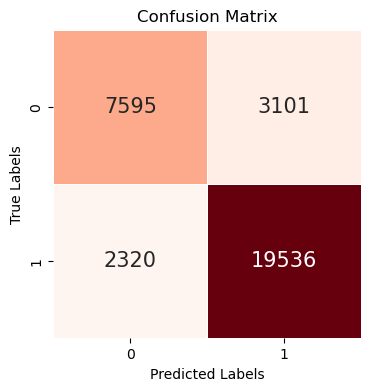

In [97]:

# # Plotting confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(CM_LR, annot=True, fmt="d", cmap="Reds", cbar=False,
            annot_kws={"size": 15}, linewidths=0.5, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# **PRC AND ROC CURVE**

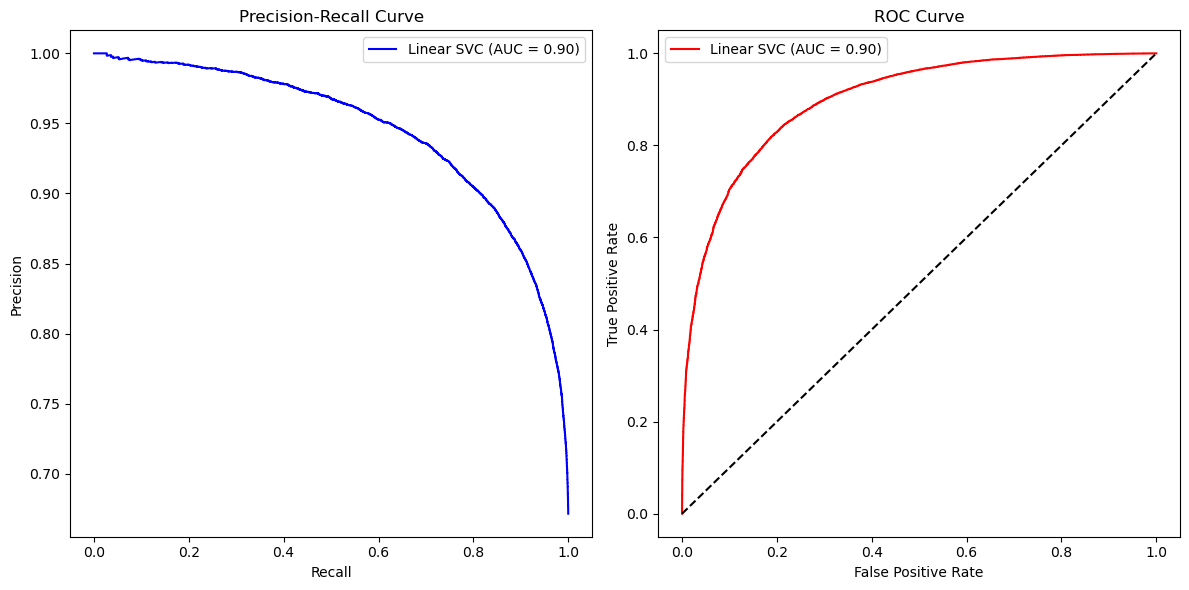

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate predicted decision scores for the LinearSVC model
decision_scores = pipe3.decision_function(X_test)

# Calculate Precision-Recall Curve
precision4, recall4, _ = precision_recall_curve(y_test, decision_scores)

# Calculate ROC Curve
fpr4, tpr4, _ = roc_curve(y_test, decision_scores)
roc_auc4 = auc(fpr4, tpr4)

# Plot Precision-Recall Curve and ROC Curve
plt.figure(figsize=(12, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall4, precision4, color='b', label=f'Linear SVC (AUC = {roc_auc4:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr4, tpr4, color='r', label=f'Linear SVC (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

# **Hyperparameter Tuning in LinearSVC**

In [99]:
# pipe4 = Pipeline([
#      ('column_transformer', ct),
#      #('classifier', LinearSVC(random_state=42,max_iter=5000))  
#      #('logistic', LogisticRegression(random_state=42,max_iter=5000))
#      #('logistic', LogisticRegression(solver='saga', max_iter=1500, random_state=42,penalty='l2',C=6))
#      ('Classifier', LinearSVC(C=0.3, random_state=42,max_iter=5000,tol=0.0001))
# ])

pipe4 = Pipeline([
     ('column_transformer', ct),
     ('Classifier', LinearSVC(C=0.3, random_state=42, max_iter=5000, tol=1e-7))
])


# **Learning and Key Points**
* **Choose the classifier based on the nature of your data and the problem you're trying to solve.**

* **Experiment with different classifier options and their hyperparameters to find the best-performing model. This might involve trying different regularization strengths, solvers, and optimization parameters.**
* **Always evaluate the performance of your chosen classifier using appropriate evaluation metrics on a validation or test dataset.**
* **Consider using techniques like cross-validation to estimate the generalization performance of your model more accurately.**
* **Remember that the choice of classifier and hyperparameters can significantly impact the performance of your model. It's a good idea to try multiple options, fine-tune the hyperparameters, and compare the results to make an informed decision.**

In [100]:
# # fitting to data
pipe4.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['audienceScore']),
                                                 ('scaler2', RobustScaler(),
                                                  ['runtimeMinutes']),
                                                 ('scaler3', MinMaxScaler(),
                                                  ['boxOffice']),
                                                 ('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'reviewText'),
                                                 ('text1', TfidfVectorizer(),
                                                  'reviewerName'),
                                                 ('text3', TfidfVectorizer(),
                                                  'genre'),
                                                 ('text4', TfidfVectorizer(),
                                                  'movieid'),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['isFrequentReviewer',
                                                   'rating',
                                                   'originalLanguage'])])),
                ('Classifier',
                 LinearSVC(C=0.3, max_iter=5000, random_state=42, tol=1e-07))])

In [101]:
# # Predicting on test
y_pred4 = pipe4.predict(X_test)

# # checking the f1 score for both test and train
print('Train f1 score: ',f1_score(y_train, pipe4.predict(X_train)))
print('Test f1 score: ',f1_score(y_test, y_pred4))

Train f1 score:  0.9763453611480111
Test f1 score:  0.8819308254590836


In [102]:
# Classification report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74     10696
           1       0.86      0.91      0.88     21856

    accuracy                           0.84     32552
   macro avg       0.82      0.80      0.81     32552
weighted avg       0.83      0.84      0.83     32552



In [103]:
# output['LinearSVC_hpt'] = {'Train': 0.9763, 'Test': 0.8819}

In [104]:
# # confusion matrix
CM_LR = confusion_matrix(y_test,y_pred4)
print(CM_LR)

[[ 7467  3229]
 [ 2069 19787]]


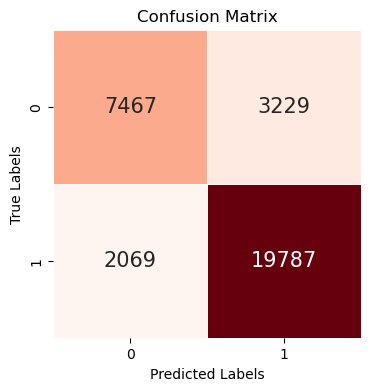

In [105]:

# # Plotting confusion matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(4, 4))
sns.heatmap(CM_LR, annot=True, fmt="d", cmap="Reds", cbar=False,
             annot_kws={"size": 15}, linewidths=0.5, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# **PRC AND ROC CURVE**

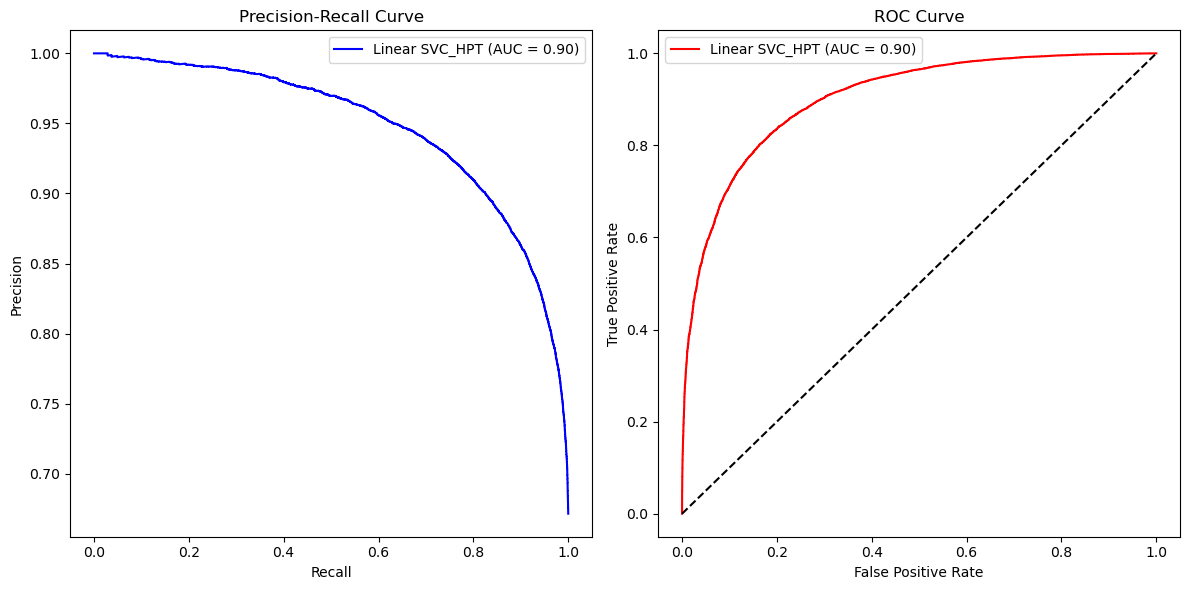

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate predicted decision scores for the LinearSVC model
decision_scores = pipe4.decision_function(X_test)

# Calculate Precision-Recall Curve
precision4, recall4, _ = precision_recall_curve(y_test, decision_scores)

# Calculate ROC Curve
fpr4, tpr4, _ = roc_curve(y_test, decision_scores)
roc_auc4 = auc(fpr4, tpr4)

# Plot Precision-Recall Curve and ROC Curve
plt.figure(figsize=(12, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall4, precision4, color='b', label=f'Linear SVC_HPT (AUC = {roc_auc4:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr4, tpr4, color='r', label=f'Linear SVC_HPT (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

In [107]:
y_pred_SVC=pipe4.predict(test_merged)

In [108]:
y_pred_SVC

array([1, 1, 1, ..., 0, 1, 0])

In [109]:
submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=[i for i in range(len(y_pred_SVC))]
submission['sentiment']=label_encoder.inverse_transform(y_pred_SVC)


In [110]:
submission.to_csv('submission.csv', index=False,encoding = 'utf-8')


In [111]:
print(submission.head())
submission.shape

   id sentiment
0   0  POSITIVE
1   1  POSITIVE
2   2  POSITIVE
3   3  POSITIVE
4   4  POSITIVE


(55315, 2)

# **Base Model 3 SGD Classifier with Perceptron**

In [112]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline

 # Assuming ct1 and ct are defined earlier in your code

 # Creating the pipeline pipe3 with SGDClassifier with Perceptron as the estimator and ct1 as the ColumnTransformer
pipe5 = Pipeline([
     ('preprocess', ct),                 # Apply the ColumnTransformer 'ct1'
     ('classifier', SGDClassifier(loss='perceptron', random_state=42, max_iter=5000))  # Use SGDClassifier with Perceptron loss
])


In [113]:
# # fitting to data
pipe5.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['audienceScore']),
                                                 ('scaler2', RobustScaler(),
                                                  ['runtimeMinutes']),
                                                 ('scaler3', MinMaxScaler(),
                                                  ['boxOffice']),
                                                 ('tfidf',
                                                  TfidfVectorizer(ngram_range=(1,
                                                                               2)),
                                                  'reviewText'),
                                                 ('text1', TfidfVectorizer(),
                                                  'reviewerName'),
                                                 ('text3', TfidfVectorizer(),
                                                  'genre'),
                                                 ('text4', TfidfVectorizer(),
                                                  'movieid'),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['isFrequentReviewer',
                                                   'rating',
                                                   'originalLanguage'])])),
                ('classifier',
                 SGDClassifier(loss='perceptron', max_iter=5000,
                               random_state=42))])

In [114]:
# # Predicting on test
y_pred5 = pipe5.predict(X_test)

# # checking the f1 score for both test and train
print('Train f1 score: ',f1_score(y_train, pipe5.predict(X_train)))
print('Test f1 score: ',f1_score(y_test, y_pred5))

Train f1 score:  0.9282439948658394
Test f1 score:  0.8256599292446996


In [115]:
# output['SGDClassifier'] = {'Train': 0.9282, 'Test': 0.8256}

# **SGDClassifier (Stochastic Gradient Descent Classifier):**

* **Train Score: 0.9440**
* **Test Score: 0.8385**
* **Insights: This model has a relatively balanced performance, but the test score is lower compared to some other models.**
* **It might be worth investigating further whether this difference is significant and whether there's room for improvement.**

In [116]:
# Classification report
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71     10696
           1       0.90      0.76      0.83     21856

    accuracy                           0.78     32552
   macro avg       0.76      0.79      0.77     32552
weighted avg       0.81      0.78      0.79     32552



In [117]:
# # confusion matrix
CM_LR = confusion_matrix(y_test,y_pred5)
print(CM_LR)

[[ 8818  1878]
 [ 5169 16687]]


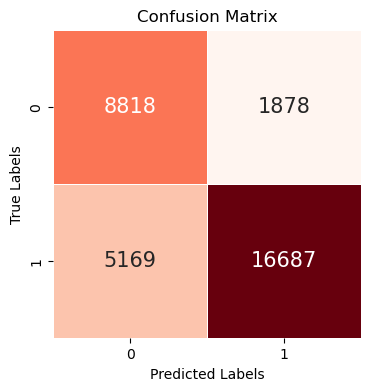

In [118]:


# # Plotting confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 4))
sns.heatmap(CM_LR, annot=True, fmt="d", cmap="Reds", cbar=False,
             annot_kws={"size": 15}, linewidths=0.5, square=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

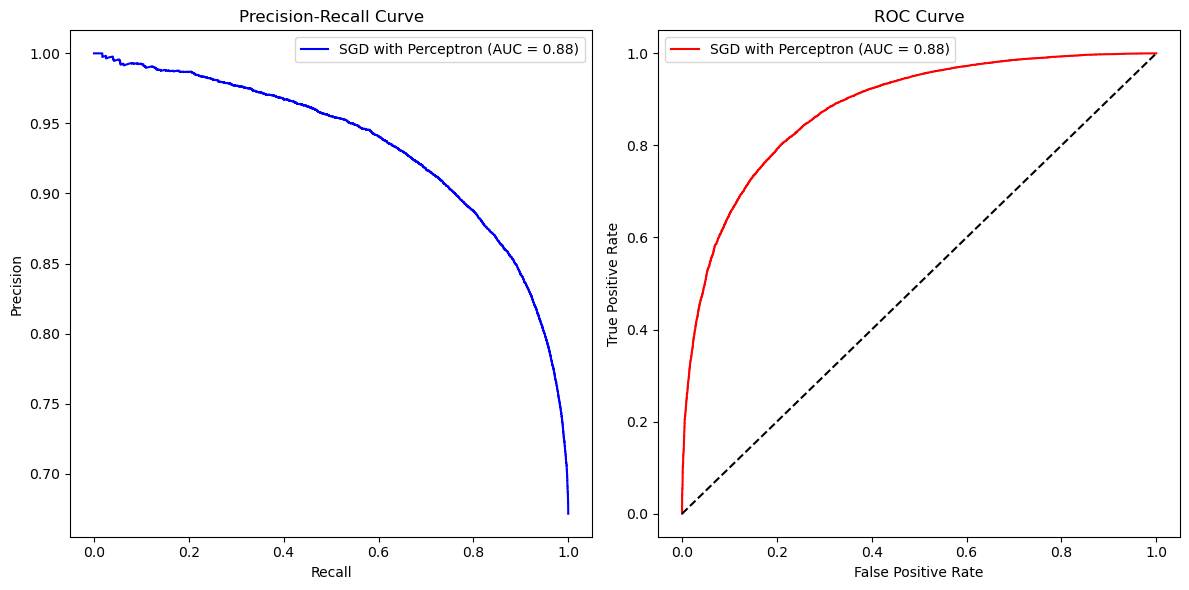

In [119]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate predicted decision scores for the LinearSVC model
decision_scores = pipe5.decision_function(X_test)

# Calculate Precision-Recall Curve
precision4, recall4, _ = precision_recall_curve(y_test, decision_scores)

# Calculate ROC Curve
fpr4, tpr4, _ = roc_curve(y_test, decision_scores)
roc_auc4 = auc(fpr4, tpr4)

# Plot Precision-Recall Curve and ROC Curve
plt.figure(figsize=(12, 6))

# Plot Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall4, precision4, color='b', label=f'SGD with Perceptron (AUC = {roc_auc4:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr4, tpr4, color='r', label=f'SGD with Perceptron (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

# **Learning and Key Points**

**Perceptron Algorithm: The choice of using the Perceptron loss function implies that you're experimenting with a simple linear classification algorithm. The Perceptron algorithm is a foundation for neural networks and linear classifiers. It updates weights based on misclassified instances, aiming to find a linear decision boundary between classes.**

# **Comparison Between Models**

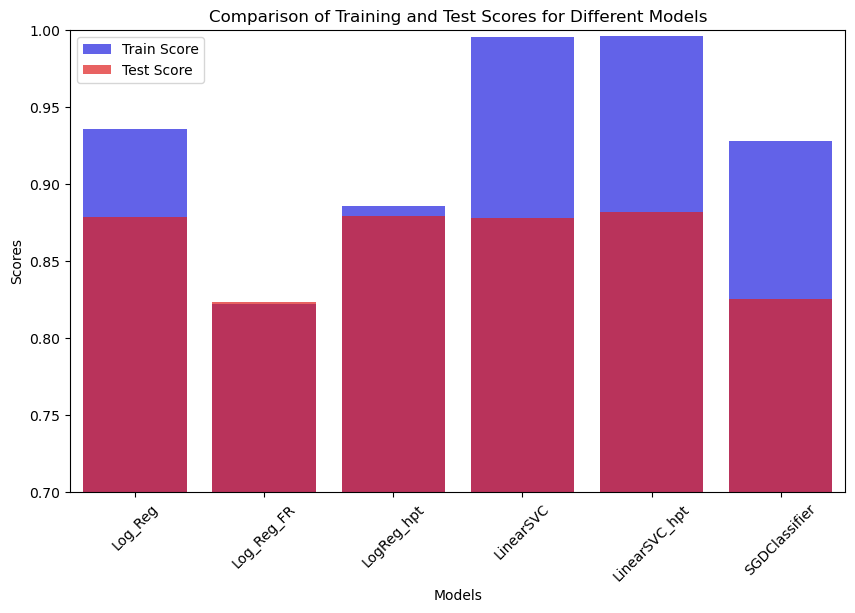

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

output = {
    'Log_Reg': {'Train': 0.9360, 'Test': 0.8787},
    'Log_Reg_FR': {'Train': 0.8223, 'Test': 0.8231},
    'LogReg_hpt': {'Train': 0.8857, 'Test': 0.8794},
    'LinearSVC': {'Train': 0.9954, 'Test': 0.8781},
    'LinearSVC_hpt' : {'Train': 0.9963, 'Test': 0.8819},
    'SGDClassifier': {'Train': 0.9282, 'Test': 0.8256}
}


models = list(output.keys())
train_scores = [output[model]['Train'] for model in models]
test_scores = [output[model]['Test'] for model in models]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=train_scores, color='b', alpha=0.7, label='Train Score')
sns.barplot(x=models, y=test_scores, color='r', alpha=0.7, label='Test Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Training and Test Scores for Different Models')
plt.legend(loc='upper left')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45)
plt.show()




# This code will generate a bar plot with the model names on the x-axis and their respective training and test scores on the y-axis. 
# The blue bars represent the training scores, and the red bars represent the test scores. 
# The plot will help you compare the performance of different models on both training and test data.

# **Overall Insights:**

* **The Logistic Regression model with hyperparameter tuning (LogReg_hpt) seems to perform well both on the training and test data. It has a high train score and a competitive test score, suggesting that it's capable of generalizing effectively.**
* **LinearSVC models show high train scores but slightly lower test scores, indicating a potential issue with overfitting. Hyperparameter tuning might help mitigate overfitting.**
* **The SGDClassifier model has a comparatively lower test score, which might suggest room for improvement. You could consider experimenting with different hyperparameters or optimization techniques.**
* **Remember that model performance is not solely determined by accuracy scores; it also depends on factors like the business context, the balance between precision and recall, the potential impact of false positives and false negatives, and computational efficiency. It's a good practice to consider multiple aspects when selecting the best model for your specific use case.**

# **PRC and ROC Curve**

# **It is a comparison among all the prc and roc curve of all the models **
* **pipe1 is Logistic Regression**
* **pipe2 is Logistic Regression with feature reduction**
* **pipe3 is LinearSVC**
* **pipe4 is LinearSVC with Hyperparameter Tuning**
* **pipe5 is Stochastic Gradient with Perceptron**
* **pipe1_hpt is Logistic Regression with Hyperparameter Tuning**

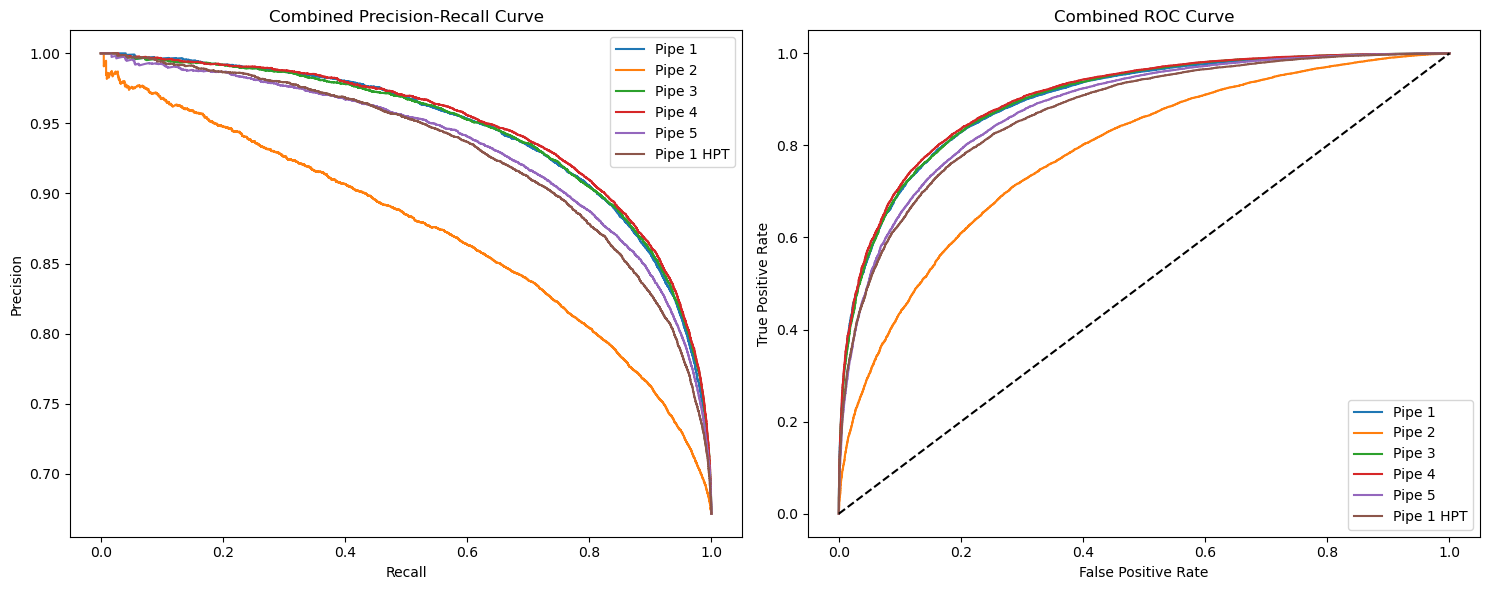

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate predicted decision scores for each pipeline
decision_scores1 = pipe1.decision_function(X_test)
decision_scores2 = pipe2.decision_function(X_test)
decision_scores3 = pipe3.decision_function(X_test)
decision_scores4 = pipe4.decision_function(X_test)
decision_scores5 = pipe5.decision_function(X_test)
decision_scores1_hpt = pipe1_hpt.decision_function(X_test)

# Calculate Precision-Recall Curves
precision1, recall1, _ = precision_recall_curve(y_test, decision_scores1)
precision2, recall2, _ = precision_recall_curve(y_test, decision_scores2)
precision3, recall3, _ = precision_recall_curve(y_test, decision_scores3)
precision4, recall4, _ = precision_recall_curve(y_test, decision_scores4)
precision5, recall5, _ = precision_recall_curve(y_test, decision_scores5)
precision1_hpt, recall1_hpt, _ = precision_recall_curve(y_test, decision_scores1_hpt)

# Calculate ROC Curves
fpr1, tpr1, _ = roc_curve(y_test, decision_scores1)
fpr2, tpr2, _ = roc_curve(y_test, decision_scores2)
fpr3, tpr3, _ = roc_curve(y_test, decision_scores3)
fpr4, tpr4, _ = roc_curve(y_test, decision_scores4)
fpr5, tpr5, _ = roc_curve(y_test, decision_scores5)
fpr1_hpt, tpr1_hpt, _ = roc_curve(y_test, decision_scores1_hpt)

# Create subplots for Precision-Recall and ROC curves
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Precision-Recall Curves
axes[0].plot(recall1, precision1, label='Pipe 1')
axes[0].plot(recall2, precision2, label='Pipe 2')
axes[0].plot(recall3, precision3, label='Pipe 3')
axes[0].plot(recall4, precision4, label='Pipe 4')
axes[0].plot(recall5, precision5, label='Pipe 5')
axes[0].plot(recall1_hpt, precision1_hpt, label='Pipe 1 HPT')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Combined Precision-Recall Curve')
axes[0].legend()

# Plot ROC Curves
axes[1].plot(fpr1, tpr1, label='Pipe 1')
axes[1].plot(fpr2, tpr2, label='Pipe 2')
axes[1].plot(fpr3, tpr3, label='Pipe 3')
axes[1].plot(fpr4, tpr4, label='Pipe 4')
axes[1].plot(fpr5, tpr5, label='Pipe 5')
axes[1].plot(fpr1_hpt, tpr1_hpt, label='Pipe 1 HPT')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Combined ROC Curve')
axes[1].legend()

plt.tight_layout()
plt.show()


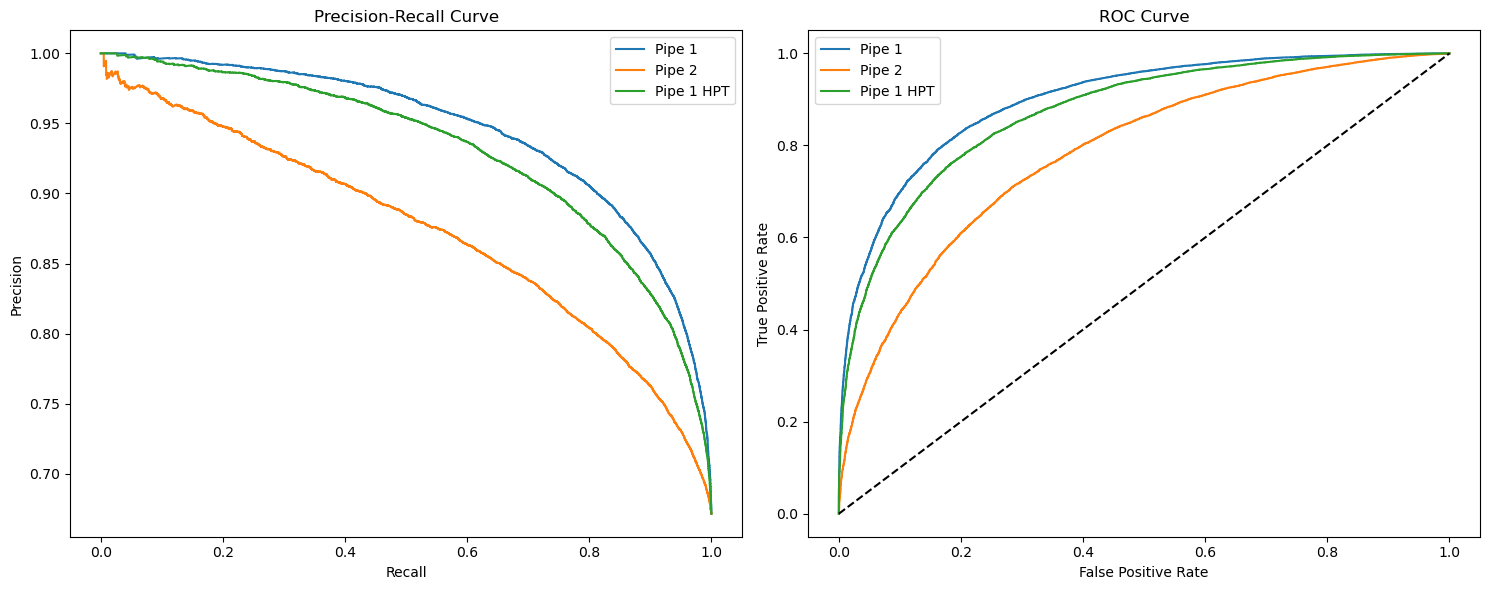

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Calculate predicted probabilities for the positive class
y_pred_prob1 = pipe1.predict_proba(X_test)[:, 1]
y_pred_prob2 = pipe2.predict_proba(X_test)[:, 1]
y_pred_prob1_hpt = pipe1_hpt.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall Curves
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_prob1)
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_prob2)
precision1_hpt, recall1_hpt, _ = precision_recall_curve(y_test, y_pred_prob1_hpt)

# Calculate ROC Curves
fpr1, tpr1, _ = roc_curve(y_test, y_pred_prob1)
fpr2, tpr2, _ = roc_curve(y_test, y_pred_prob2)
fpr1_hpt, tpr1_hpt, _ = roc_curve(y_test, y_pred_prob1_hpt)

# Create subplots for Precision-Recall and ROC curves
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Precision-Recall Curves
axes[0].plot(recall1, precision1, label='Pipe 1')
axes[0].plot(recall2, precision2, label='Pipe 2')
axes[0].plot(recall1_hpt, precision1_hpt, label='Pipe 1 HPT')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curve')
axes[0].legend()

# Plot ROC Curves
axes[1].plot(fpr1, tpr1, label='Pipe 1')
axes[1].plot(fpr2, tpr2, label='Pipe 2')
axes[1].plot(fpr1_hpt, tpr1_hpt, label='Pipe 1 HPT')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend()

plt.tight_layout()
plt.show()


# **Logistic Regression with different aprroach and different preprocessing**

In [123]:
# # Importing necessary libraries
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score, classification_report, confusion_matrix
# from imblearn.over_sampling import SMOTE
# from imblearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler,LabelEncoder
# from sklearn.metrics import accuracy_score

# # Split the dataset into features (X) and labels (y)
# X = merged_data.drop(['sentiment'], axis=1)
# y = merged_data['sentiment']

# # Convert string labels to numeric labels using LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)


# # split the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Num_cols = ['audienceScore','runtimeMinutes']
# Text_cols = ['movieid','reviewerName','genre','originalLanguage','director','distributor']
# Cat_cols = ['isFrequentReviewer']
# Target_cols = ['sentiment']
# # creating column transformer
# ct1= ColumnTransformer([
#     ('scaler', StandardScaler(), ['audienceScore']),
#     ('scaler2',RobustScaler(),['runtimeMinutes']),
#     ('tfidf', TfidfVectorizer(), 'reviewText'),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'), Text_cols)
# ])


# pipe1 = Pipeline([
#     ('column_transformer', ct1),
#     ('logistic', LogisticRegression(random_state=42,max_iter=500))
# ])




# pipe1.fit(X_train,y_train)
# y_pred1 = pipe1.predict(X_test)



# # Calculate accuracy score
# #f1 = f1_score(y_test, y_pred1)
# #print(f': {accuracy:.2f}')





# # Evaluate the accuracy of the model
# #accuracy = accuracy_score(test_merged, y_pred)
# #print("Accuracy:", accuracy)

# #print('Train f1 score: ',f1_score(y_train, pipe1.predict(X_train)))
# #print('Test f1 score: ',f1_score(y_test, y_pred1))

In [124]:
#y_pred1


In [125]:
#y_test

In [126]:

# Calculate accuracy score
#f1 = f1_score(y_test, y_pred1)
#print(f': {f1:.2f}')

# **Dummy Submisssion**

In [127]:
#train_data.dtypes

In [128]:
# test_data.dtypes

In [129]:
# from sklearn.dummy import DummyClassifier

In [130]:
# X1=train_data['isFrequentReviewer']
# Y1=train_data['sentiment']

In [131]:
#dummyclassify=DummyClassifier(strategy='most_frequent')
#dummyclassify.fit(X1,Y1)

In [132]:
#dummyclassify.predict(X1)

In [133]:
#dummyclassify.score(X1,Y1)

In [134]:
#submission = pd.DataFrame(dummyclassify.predict(test_data["isTopCritic"]), columns=['sentiment'])


In [135]:
#submission.index.name = 'id'
#submission.to_csv("submission.csv", encoding='utf-8')

#output = pd.read_csv("submission.csv")

In [136]:
#output.head()

# **Milestone Work**

# ****Logistic Regression on Training data****

In [137]:
#import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.metrics import accuracy_score

# Load the dataset
#data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

# Fill missing values with empty strings
#data['reviewText'].fillna('', inplace=True)

# Split the dataset into features (X) and labels (y)
#X = data.drop(['sentiment'], axis=1)
#y = data['sentiment']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical feature columns
#cat_features = ['movieid', 'reviewerName']

# Define the text feature column
#text_feature = 'reviewText'

# Create a column transformer to handle both categorical and text features
#preprocessor = ColumnTransformer(
#    transformers=[
 #       ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
  #      ('text', TfidfVectorizer(), text_feature)
#    ],
 #   remainder='passthrough'  # Pass any other columns as they are
#)

# Initialize the logistic regression classifier
#logreg = LogisticRegression(max_iter=1000)

# Create a pipeline with the preprocessor and the classifier
#pipeline = Pipeline([
 #   ('preprocessor', preprocessor),
  #  ('classifier', logreg)
#])

# Fit the pipeline to the training data
#pipeline.fit(X_train, y_train)

# Make predictions on the testing data
#y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)'''

In [138]:
#import pandas as pd

# Load the test dataset
#test_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv')

# Fill missing values with empty strings
#test_data['reviewText'].fillna('', inplace=True)

# Create a dummy DataFrame with the missing column 'isFrequentReviewer'
#dummy_data = pd.DataFrame({'isFrequentReviewer': [0] * len(test_data)})

# Concatenate the dummy DataFrame with the test data
#test_data = pd.concat([test_data, dummy_data], axis=1)

# Make predictions on the test data
#predictions = pipeline.predict(test_data)

# Create a DataFrame with the predictions
#submission = pd.DataFrame(predictions, columns=['sentiment'])

# Save the submission to a CSV file without setting 'id' as the index
#submission.to_csv('submission.csv', encoding='utf-8', index=False)

# Check the saved submission file
#output = pd.read_csv('submission.csv')







In [139]:
#submission.index.name = 'id'
#submission.to_csv("submission.csv", encoding='utf-8')

#output = pd.read_csv("submission.csv")

In [140]:
#output.head()

# **Hyper Parameter Tuning for Milestone 2**

In [141]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import GridSearchCV

# Load the dataset
#data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

# Fill missing values with an empty string
#data['reviewText'] = data['reviewText'].fillna('')

# Split the dataset into features (X) and labels (y)
#X = data['reviewText']
#y = data['sentiment']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a TF-IDF vectorizer
#vectorizer = TfidfVectorizer(ngram_range=(1, 2))


# Define the pipeline
#pipeline = Pipeline([
 #   ('vectorizer', TfidfVectorizer()),
#  ('model', LogisticRegression(max_iter=1000))
#])

# Define the hyperparameters to tune
#parameters = {
 #   'vectorizer__ngram_range': [(1, 1), (1, 2)],
 #   'model__C': [0.1, 1, 10]
#}

# Perform grid search cross-validation
#grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)

# Get the best model from the grid search
#best_model = grid_search.best_estimator_

# Fit the vectorizer on the training data
#best_model['vectorizer'].fit(X_train)

# Make predictions on the testing data
#y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)


# **KNN Classifier in milestone 3**

In [142]:
#import pandas as pd
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.metrics import accuracy_score

# Load the dataset
#data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

# Fill missing values with empty strings
#data['reviewText'].fillna('', inplace=True)

# Split the dataset into features (X) and labels (y)
#X = data.drop(['sentiment'], axis=1)
#y = data['sentiment']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical feature columns
#cat_features = ['movieid', 'reviewerName']

# Define the text feature column
#text_feature = 'reviewText'

# Create a column transformer to handle both categorical and text features
#preprocessor = ColumnTransformer(
 #   transformers=[
  #      ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
#     ('text', TfidfVectorizer(), text_feature)
 #   ],
  #  remainder='passthrough'  # Pass any other columns as they are
#)

# Initialize the KNN classifier with k=5 (you can change k as per your choice)
#knn = KNeighborsClassifier(n_neighbors=5)

# Create a pipeline with the preprocessor and the KNN classifier
#pipeline = Pipeline([
 #   ('preprocessor', preprocessor),
  #  ('classifier', knn)
#])

# Fit the pipeline to the training data
#pipeline.fit(X_train, y_train)

# Make predictions on the testing data
#y_pred = pipeline.predict(X_test)

# Evaluate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)


# **Support Vector Machine in Milestone 3**

In [143]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC  # Import the SVM classifier
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# # Load the dataset
# data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

# # Fill missing values with empty strings
# data['reviewText'].fillna('', inplace=True)

# # Split the dataset into features (X) and labels (y)
# X = data.drop(['sentiment'], axis=1)
# y = data['sentiment']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the categorical feature columns
# cat_features = ['movieid', 'reviewerName']

# # Define the text feature column
# text_feature = 'reviewText'

# # Create a column transformer to handle both categorical and text features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
#         ('text', TfidfVectorizer(), text_feature)
#     ],
#     remainder='passthrough'  # Pass any other columns as they are
# )

# # Initialize the SVM classifier with a linear kernel (you can use other kernels as well)
# svm = SVC(kernel='linear')

# # Create a pipeline with the preprocessor and the SVM classifier
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', svm)
# ])

# # Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = pipeline.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


# **Decision Tree Classifier in MIlestone 4**

In [144]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# # Load the dataset
# data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

# # Fill missing values with empty strings
# data['reviewText'].fillna('', inplace=True)

# # Split the dataset into features (X) and labels (y)
# X = data.drop(['sentiment'], axis=1)
# y = data['sentiment']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the categorical feature columns
# cat_features = ['movieid', 'reviewerName']

# # Define the text feature column
# text_feature = 'reviewText'

# # Create a column transformer to handle both categorical and text features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
#         ('text', TfidfVectorizer(), text_feature)
#     ],
#     remainder='passthrough'  # Pass any other columns as they are
# )

# # Initialize the Decision Tree classifier
# decision_tree = DecisionTreeClassifier()

# # Create a pipeline with the preprocessor and the classifier
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', decision_tree)
# ])

# # Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = pipeline.predict(X_test)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


# **Bagging and Boosting in Milestone 4**

In [145]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# # Load the dataset
# data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

# # Fill missing values with empty strings
# data['reviewText'].fillna('', inplace=True)

# # Split the dataset into features (X) and labels (y)
# X = data.drop(['sentiment'], axis=1)
# y = data['sentiment']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the categorical feature columns
# cat_features = ['movieid', 'reviewerName']

# # Define the text feature column
# text_feature = 'reviewText'

# # Create a column transformer to handle both categorical and text features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
#         ('text', TfidfVectorizer(), text_feature)
#     ],
#     remainder='passthrough'  # Pass any other columns as they are
# )

# # ...

# # Initialize the Decision Tree classifier
# decision_tree = DecisionTreeClassifier(max_depth=10)  # Limit the depth of the decision tree

# # Create a pipeline with the preprocessor and the Decision Tree classifier
# pipeline_dt = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', decision_tree)
# ])

# # Fit the pipeline to the training data
# pipeline_dt.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred_dt = pipeline_dt.predict(X_test)

# # Evaluate the accuracy of the Decision Tree model
# accuracy_dt = accuracy_score(y_test, y_pred_dt)
# print("Decision Tree Accuracy:", accuracy_dt)

# # Apply Bagging with the Decision Tree classifier
# bagging_classifier = BaggingClassifier(base_estimator=decision_tree, n_estimators=10, random_state=42)  # Reduce the number of estimators

# # Create a pipeline with the preprocessor and the Bagging classifier
# pipeline_bagging = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', bagging_classifier)
# ])

# # Fit the pipeline to the training data
# pipeline_bagging.fit(X_train, y_train)

# # Make predictions on the testing data using Bagging
# y_pred_bagging = pipeline_bagging.predict(X_test)

# # Evaluate the accuracy of the Bagging model
# accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
# print("Bagging Accuracy:", accuracy_bagging)

# # Apply Boosting with the Decision Tree classifier
# boosting_classifier = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=10, random_state=42)  # Reduce the number of estimators

# # Create a pipeline with the preprocessor and the Boosting classifier
# pipeline_boosting = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', boosting_classifier)
# ])

# # Fit the pipeline to the training data
# pipeline_boosting.fit(X_train, y_train)

# # Make predictions on the testing data using Boosting
# y_pred_boosting = pipeline_boosting.predict(X_test)

# # Evaluate the accuracy of the Boosting model
# accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
# print("Boosting Accuracy:", accuracy_boosting)


# **Multi Layer Perceptron in Milestone 4**

In [146]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# # Load the dataset
# data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')

# # Fill missing values with empty strings
# data['reviewText'].fillna('', inplace=True)

# # Split the dataset into features (X) and labels (y)
# X = data.drop(['sentiment'], axis=1)
# y = data['sentiment']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the categorical feature columns
# cat_features = ['movieid', 'reviewerName']

# # Define the text feature column
# text_feature = 'reviewText'

# # Create a column transformer to handle both categorical and text features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
#         ('text', TfidfVectorizer(), text_feature)
#     ],
#     remainder='passthrough'  # Pass any other columns as they are
# )

# # Initialize the MLP classifier
# mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# # Create a pipeline with the preprocessor and the MLP classifier
# pipeline_mlp = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', mlp_classifier)
# ])

# # Fit the pipeline to the training data
# pipeline_mlp.fit(X_train, y_train)

# # Make predictions on the testing data using MLP
# y_pred_mlp = pipeline_mlp.predict(X_test)

# # Evaluate the accuracy of the MLP model
# accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
# print("MLP Accuracy:", accuracy_mlp)